# Computer Science 2XC3 - Graded Lab II


In this day and age, it is very easy to generate automated solutions to any problem, not necessarily becuase of AI, but because of vast online communities that exist to find solution to popular/common problems. Whether or not that solution is correct and applicable to our context, can be assessed only if we understand the concepts and can critically evaluate them. The goal of this lab is to motivate you to not only produce the correct solution to problems, but also to reflect about why, how and when your solution will likely succeed/fail.

In this lab you will design experiments with sorting and search algorithms. Please read all instructions carefully. Seek the help of TA's if you need clarifications on the task. Do not hard code any results.


In [2]:
import random
import time
import timeit
import matplotlib.pyplot as plt
import numpy as np

---
---


### Part A


##### A1. Implement three classes with the following sorting algorithms:

- Bubble Sort
- Insertion Sort
- Selection Sort


In [3]:
class BubbleSort():
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items = []
        self.sort()

       # your implementation for bubble sort goes here
    def sort(self):
        # Bubble Sort Algorithm
        x = len(self.items)
        # Copying the items to not modify the original list x
        self.sorted_items = self.items.copy()

        for i in range(x - 1):
            for j in range(0, x - i - 1):
                if self.sorted_items[j] > self.sorted_items[j + 1]:
                    # Swappinhg if the element found is greater than the next element
                    self.sorted_items[j], self.sorted_items[j +
                                                            1] = self.sorted_items[j + 1], self.sorted_items[j]

    def get_sorted(self,):
        return self.sorted_items

In [4]:
class InsertionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items = []
        self.sorted_items = self._insertion_sort()

    def _insertion_sort(self):
        sorted_items = self.items.copy()

        for i in range(1, len(sorted_items)):
            K = sorted_items[i]
            j = i - 1

            while j >= 0 and K < sorted_items[j]:
                sorted_items[j + 1] = sorted_items[j]
                j -= 1

            sorted_items[j + 1] = K

        return sorted_items

    def get_sorted(self,):
        return self.sorted_items

In [5]:
class SelectionSort:
    def __init__(self, items_to_sort):
        self.items = items_to_sort
        self.sorted_items = []
        self.selection_sort()

       # your implementation for selection sort goes here

    def selection_sort(self):
        x = len(self.items)
        for i in range(x):
            # To Find the minimum element in the unsorted part
            min_index = i
            for j in range(i + 1, x):
                if self.items[j] < self.items[min_index]:
                    min_index = j

            self.items[i], self.items[min_index] = self.items[min_index], self.items[i]

            # Append the sorted element to the sorted_items list
            self.sorted_items.append(self.items[i])

    def get_sorted(self,):
        return self.sorted_items

---


##### A2. Compute the performance of above 3 algorithms on a single list of real numbers.

First generate a custom random list using function <code> create_custom_list()</code>. Execute each of the above algorithm for N trials ( select N >= 75) on the list and plot the timing of each execution on a bar chart. Also calculate the average execution time for the entire batch of N trials ( you can either display it on the chart or simply <code> print()</code> it). For larger values of N, consider breaking N trials into mini batches of n executions and plotting execution times for each mini batch. For instance, if you select N=1000, to plot execution timings for 1000 trials, you may break them into mini batch of n=10 trials and display average of each mini batch. This will reduce clutter in your bar charts while still enabling you to perform extensive testing with higher N.

Execute each of the above algorithm on the same set of integers. The outcome of your code should be 3 charts for each algorithm run on your list N times. Few utility functions are given below. You do not have to necessarily use the <code> draw_plot()</code> function. You can plot your timings using an excel sheet and paste the image of your timings here. Refer to [Markdown Guide](https://www.markdownguide.org/basic-syntax/) on how to add images in the jupyter notebook or ask your TA.


In [6]:
def create_custom_list(length, max_value, item=None, item_index=None):
    random_list = [random.randint(0, max_value) for i in range(length)]
    if item != None:
        random_list.insert(item_index, item)
    return random_list

In [7]:
def draw_plot(run_arr):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize=(20, 8))
    plt.bar(x, run_arr)
    plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
    plt.xlabel("Iterations")
    plt.ylabel("Run time in ms order of 1e-6")
    plt.title("Run time for retrieval")
    plt.show()

In [8]:
runs = 100
# array of 500 random numbers between 0 and 1000
random_arr = create_custom_list(100, 1000)

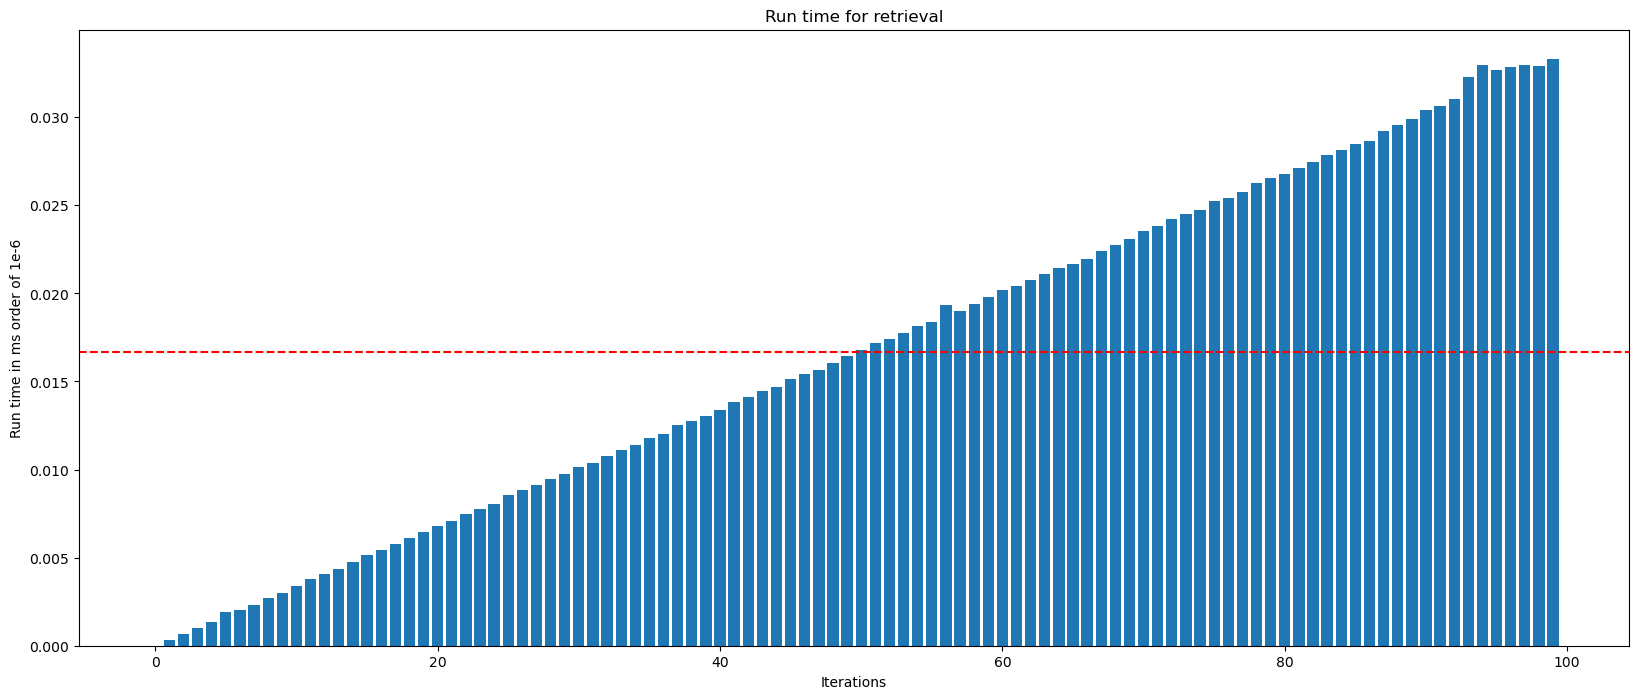

In [9]:
# Bubble sort experiment code goes here
run_arr = []
for i in range(runs):
    delta = timeit.timeit(lambda: BubbleSort(random_arr), number=i)
    run_arr.append(delta)
draw_plot(run_arr)

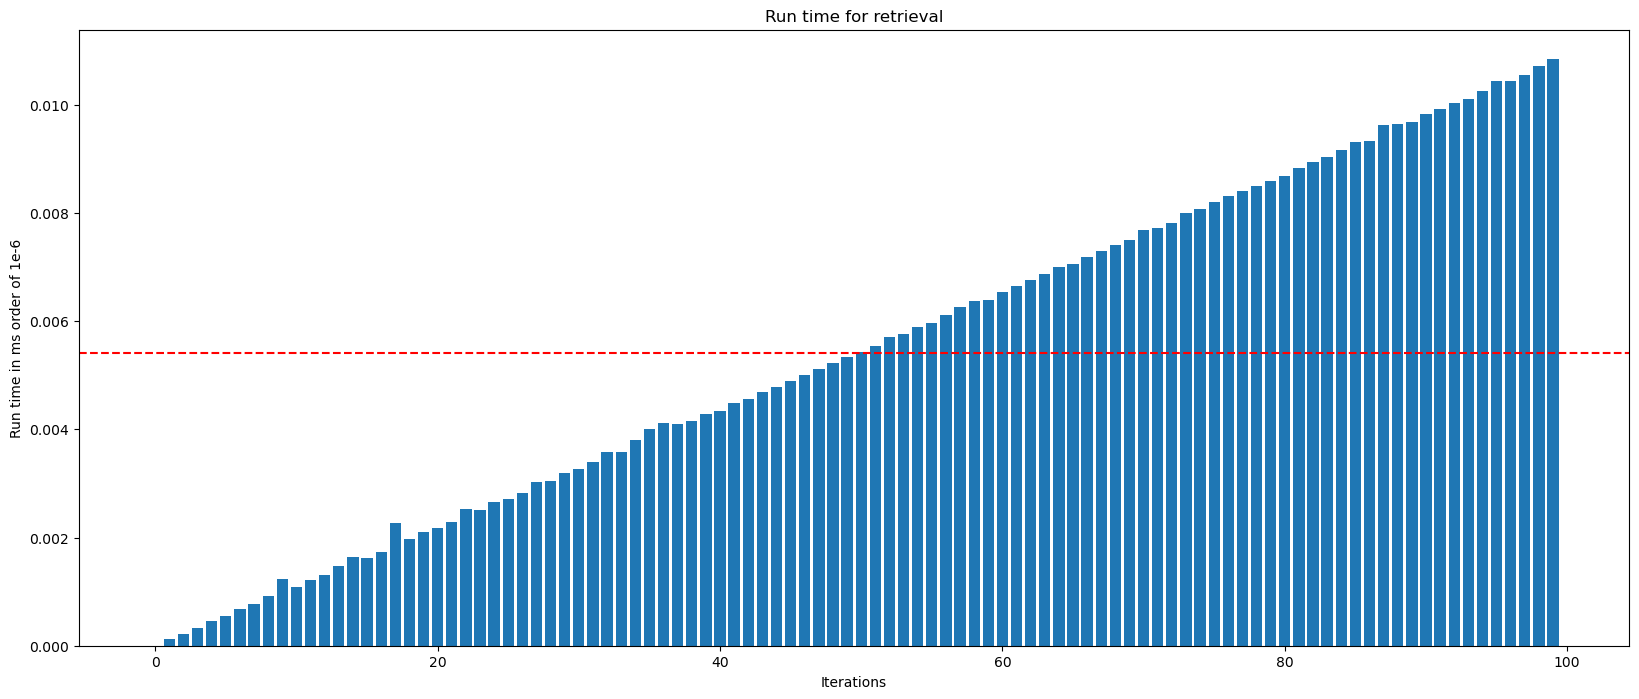

In [10]:
# Insertion sort experiment code goes here
run_arr = []
for i in range(runs):
    delta = timeit.timeit(lambda: InsertionSort(random_arr), number=i)
    run_arr.append(delta)
draw_plot(run_arr)

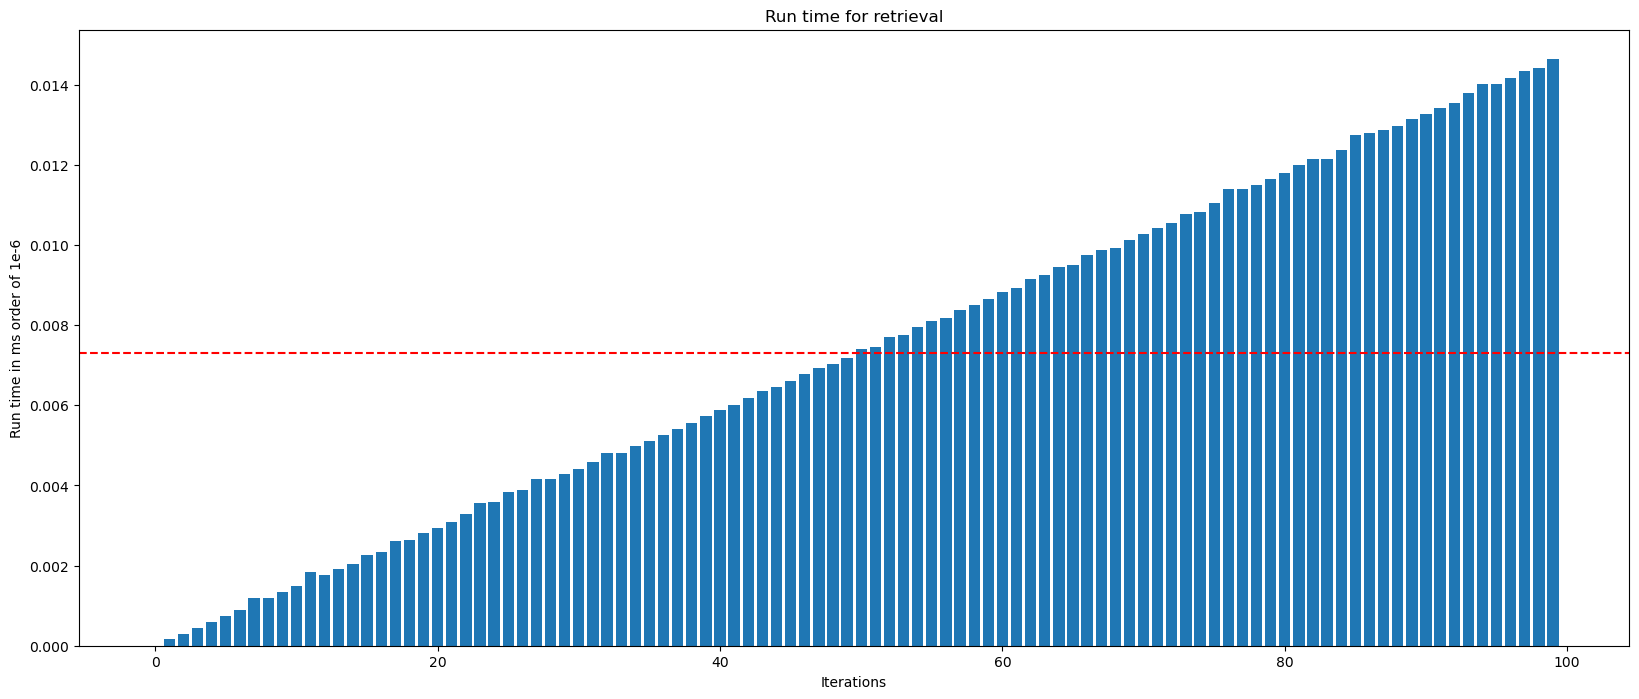

In [11]:
# Selection sort experiment code goes here
run_arr = []
for i in range(runs):
    delta = timeit.timeit(lambda: SelectionSort(random_arr), number=i)
    run_arr.append(delta)
draw_plot(run_arr)

# Reflection


You would notice that certain sorting algorithms have better time complexity (or performance) than others. Write below a reflection of your observations. Can you confidently compare the performance across the 3 algorithms? Why does certain algorithm perform better than the other? What are the various factors impacting the best performing and the worst performing algorithm. Write a few sentences answering each of the above questions. Also describe any other observation you found important.

**Reflection**:
The most efficient algorithm over the range of inputs we tested was insertion sort, the least efficient was selection sort. Insertion sort was marginally better than bubblesort, and an order of magnitude better than selection sort. although all the above algorithms have the same time complexity, within a certain range, they can still have vastly different performance over the same inputs, as is shown above.

All the graphs look the same, but that is because we're testing on the same inputs, and only increasing the number of iterations at each timestep, the graphs should scale linearly theoretically.


---


##### A3. Compute the performance of above 3 algorithms on a different list sizes.

The <code> create_custom_list()</code> helps you create lists of varying lengths and range of numbers. Plot a **line chart** that shows the performance of each algorithm on different list sizes ranging between 1 - 100,000 integers. If you think about this question, you are essentially plotting the time complexity on various list sizes.


In [12]:
sizes = np.arange(1000, 5000, 100)

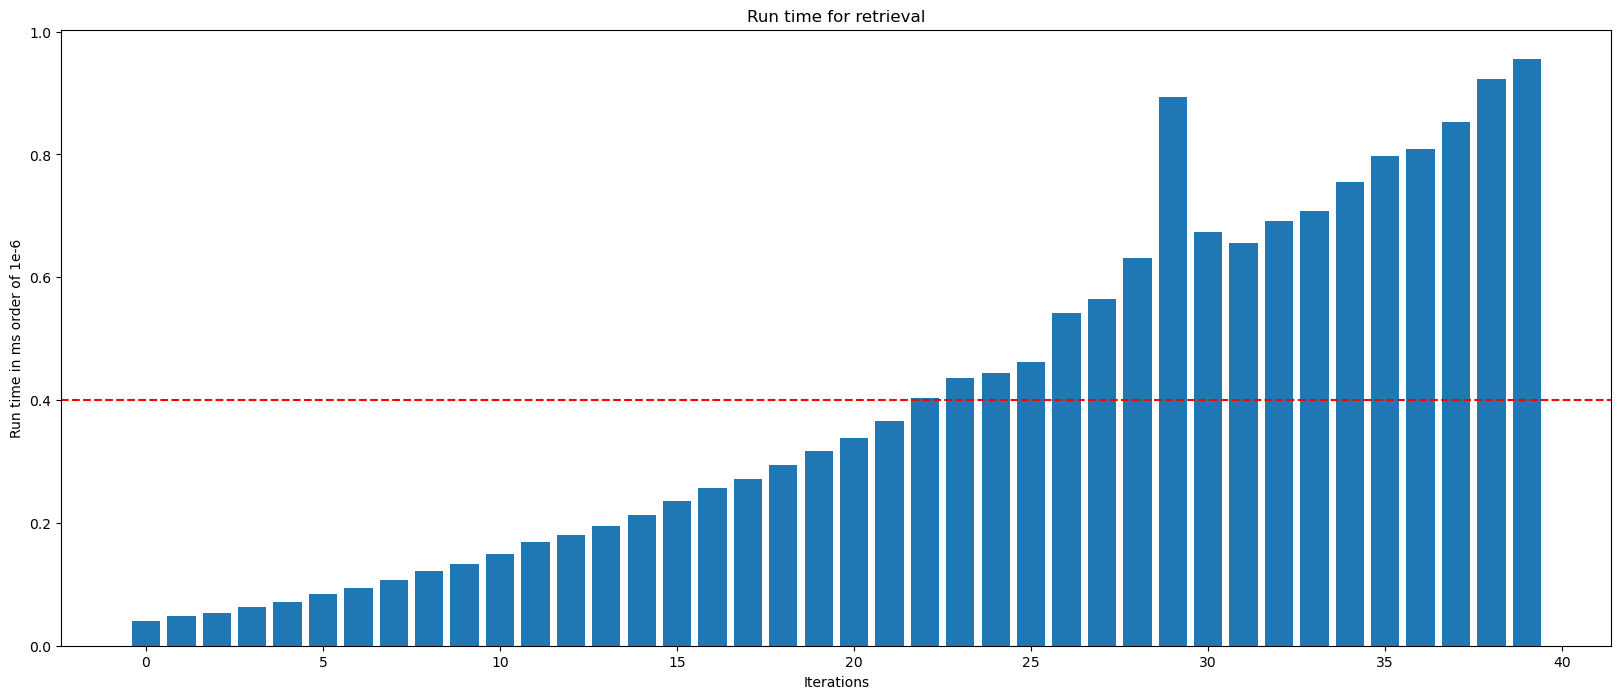

In [13]:
# Bubble sort experiment code goes here
run_arr = []
for size in sizes:
    random_arr = create_custom_list(size, 1000)
    delta = timeit.timeit(lambda: BubbleSort(random_arr), number=1)
    run_arr.append(delta)
draw_plot(run_arr)

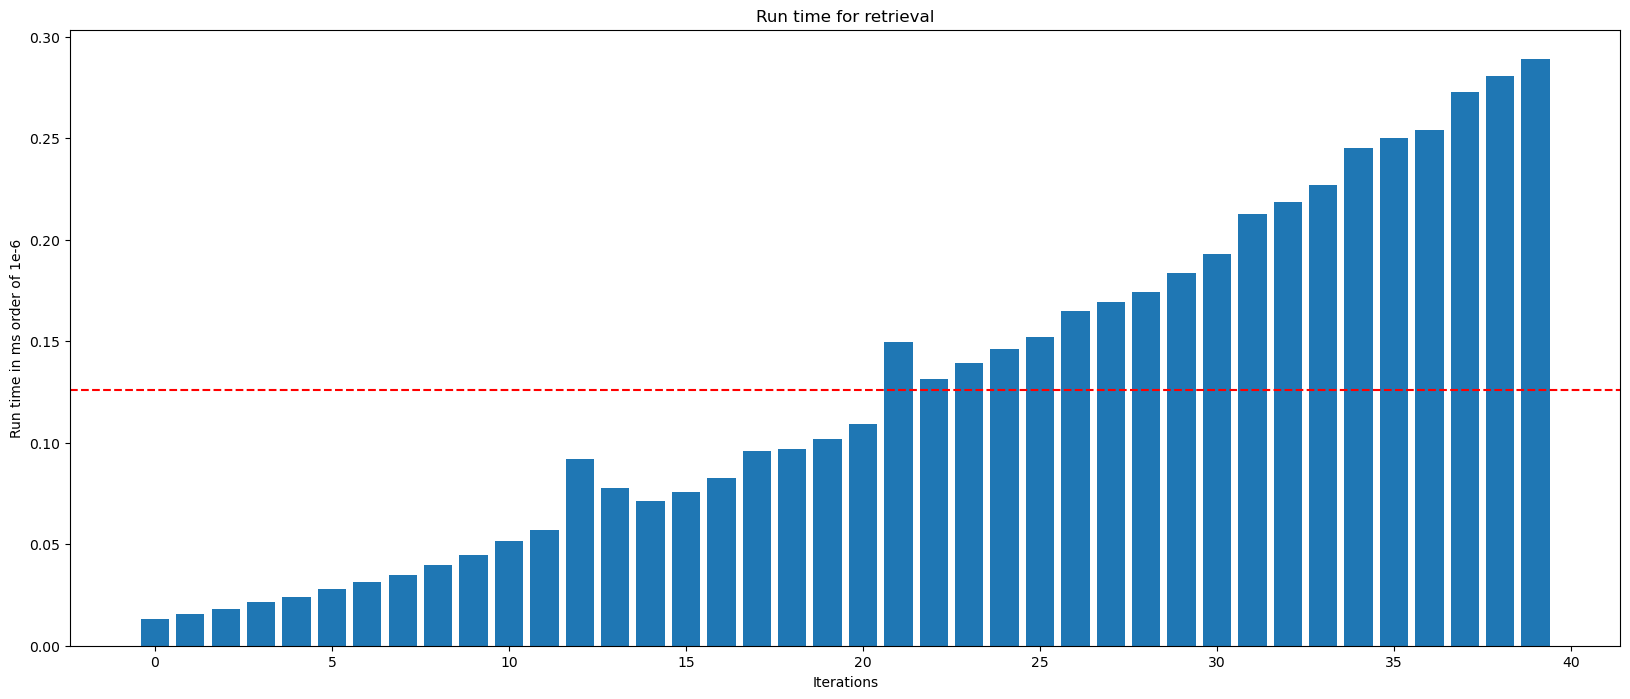

In [14]:
# Insertion sort experiment code goes here
run_arr = []
for size in sizes:
    random_arr = create_custom_list(size, 1000)
    delta = timeit.timeit(lambda: InsertionSort(random_arr), number=1)
    run_arr.append(delta)
draw_plot(run_arr)

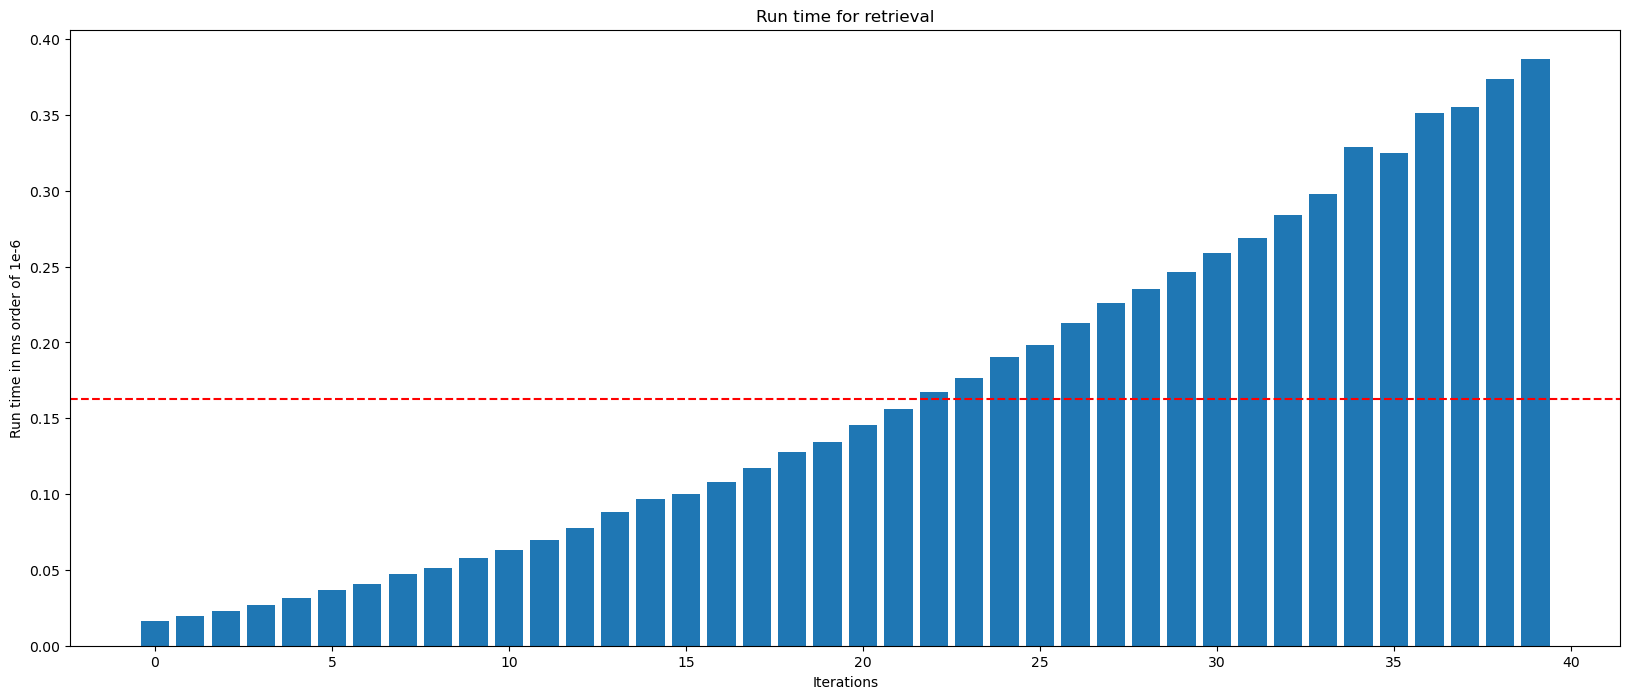

In [15]:
# Selection sort experiment code goes here
run_arr = []
for size in sizes:
    random_arr = create_custom_list(size, 1000)
    delta = timeit.timeit(lambda: SelectionSort(random_arr), number=1)
    run_arr.append(delta)
draw_plot(run_arr)

# Reflection


Describe you results here. What did you observe when comparing the charts? Which algorithm was more performant and why?

**Reflection** :
Since this time we are actually incrementally increasing the sizes of the input, we can see that the execution time seems to increase exponentially as the input increases, which aligns with the time complexity of these algorithms we learned in 2CO3. Note, that some algorithms are still faster than the others. Insertion and selection sort are still more than twice as fast on average than bubblesort


---


##### A4. Compute the performance of above 3 algorithms on a different list "states".

Using the same above list generation function (or writing a function of your own), create two different lists states:

- A state where the list is **near** sorted.
- A state where the list is completely unsorted.

HINTS:

- You can implement a "controlled" Quicksort algorithm for such a function. While you can find many implementations of such a function online, significant number of those solutions originate from this psuedocode [Generating Sorted Lists of Random Numbers](https://dl.acm.org/doi/pdf/10.1145/355900.355907).

- You can modify the list generation code given above to create the above list examples.

Compare the performance of all 3 sorting algorithms on these two lists. Plot their performance on bar chart and display them here.


In [16]:
def generate_near_sorted_list(length, max_value, swap_count):
    random_list = [i for i in range(length)]

    for i in range(swap_count):
        index1 = random.randint(0, length - 1)
        index2 = random.randint(0, length - 1)
        random_list[index1], random_list[index2] = random_list[index2], random_list[index1]
    return random_list

In [17]:
# generate a near sorted list with 25 swaps
near_sorted_list = generate_near_sorted_list(10000, 1000, 10)
unsorted_list = create_custom_list(10000, 1000)  # generate a random list

In [18]:
# Bubble sort experiment code goes here

delta = timeit.timeit(lambda: BubbleSort(unsorted_list.copy()), number=1)
delta_near_sorted = timeit.timeit(
    lambda: BubbleSort(near_sorted_list.copy()), number=1)

print("Bubble sort time for unsorted list (seconds): ", delta)
print("Bubble sort time for near sorted list (seconds): ", delta_near_sorted)

Bubble sort time for unsorted list (seconds):  4.198425834001682
Bubble sort time for near sorted list (seconds):  2.3219134169994504


In [19]:
# Selection sort experiment code goes here
delta = timeit.timeit(lambda: SelectionSort(unsorted_list.copy()), number=1)
delta_near_sorted = timeit.timeit(
    lambda: SelectionSort(near_sorted_list.copy()), number=1)

print("Selection sort time for unsorted list (seconds): ", delta)
print("Selection sort time for near sorted list (seconds): ", delta_near_sorted)

Selection sort time for unsorted list (seconds):  1.7665114170013112
Selection sort time for near sorted list (seconds):  1.7125832500023535


In [20]:
# Insertion sort experiment code goes here
delta = timeit.timeit(lambda: InsertionSort(unsorted_list.copy()), number=1)
delta_near_sorted = timeit.timeit(
    lambda: InsertionSort(near_sorted_list.copy()), number=1)

print("Insertion sort time for unsorted list (seconds): ", delta)
print("Insertion sort time for near sorted list (seconds): ", delta_near_sorted)

Insertion sort time for unsorted list (seconds):  1.3579304169979878
Insertion sort time for near sorted list (seconds):  0.0033085420000134036


# Reflection


Describe you observations here. Which algorithm performs best / worst for sorted/near sorted lists and why? Does the performance vary significantly? Describe which runs times were higher and why do you think that is? You woul

**Reflection** :
On this specific (near-sorted) input, insertion sort was many orders of magnitude better than the other algorithms. On all other inputs, the algorithms performed within the same magnitude of efficiency. For the unsorted array, selection/insertion sort had similar times. Bubble sort took twice as long

for the near sorted array however, insertion sort was able to take advantage of it's linear pointer iteration through sorted partitions of the array, making the time complexity near O(n) for it's performance on the near sorted list


---
---


### Part B


In the class, we discussed three implementations of Binary Search.


In [21]:
def binary_search_1(item_list, to_find):
    lower = 0
    upper = len(item_list)-1
    while lower < upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper = mid
    return item_list[lower] == to_find

In [22]:
def binary_search_2(item_list, to_find):
    lower = 0
    upper = len(item_list)-1
    while lower <= upper:
        mid = (lower+upper)//2
        if item_list[mid] == to_find:
            return True
        if item_list[mid] < to_find:
            lower = mid+1
        else:
            upper = mid-1
    return item_list[lower] == to_find

In [23]:
def binary_search_3(item_list, to_find):
    left = 0
    right = len(item_list)-1
    while left != right:
        mid = (left+right)//2
        if item_list[mid] < to_find:
            left = mid+1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True
    return item_list[left] == to_find

In [24]:
def draw_plot_custom(run_arr, title, x_title, y_title):
    x = np.arange(0, len(run_arr), 1)
    fig = plt.figure(figsize=(20, 8))
    plt.bar(x, run_arr)
    plt.axhline(np.mean(run_arr), color="red", linestyle="--", label="Avg")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(title)
    plt.show()

Compare the performance of each implementation (or variation) with two lists:

1. List is odd numbered (minimum 1000 integers)
1. List is even numbered (minimum 1000 integers)

Run the above experiments when the item to be found is:

1. At the begining of the list.
1. Towards the end of the list.
1. Right at the middle of the list.

The above three combinations would yield 3X2 experiments. Provide detailed outline of the experiments, plots, and a brief description of the observations in the reflections section.


Found:  True


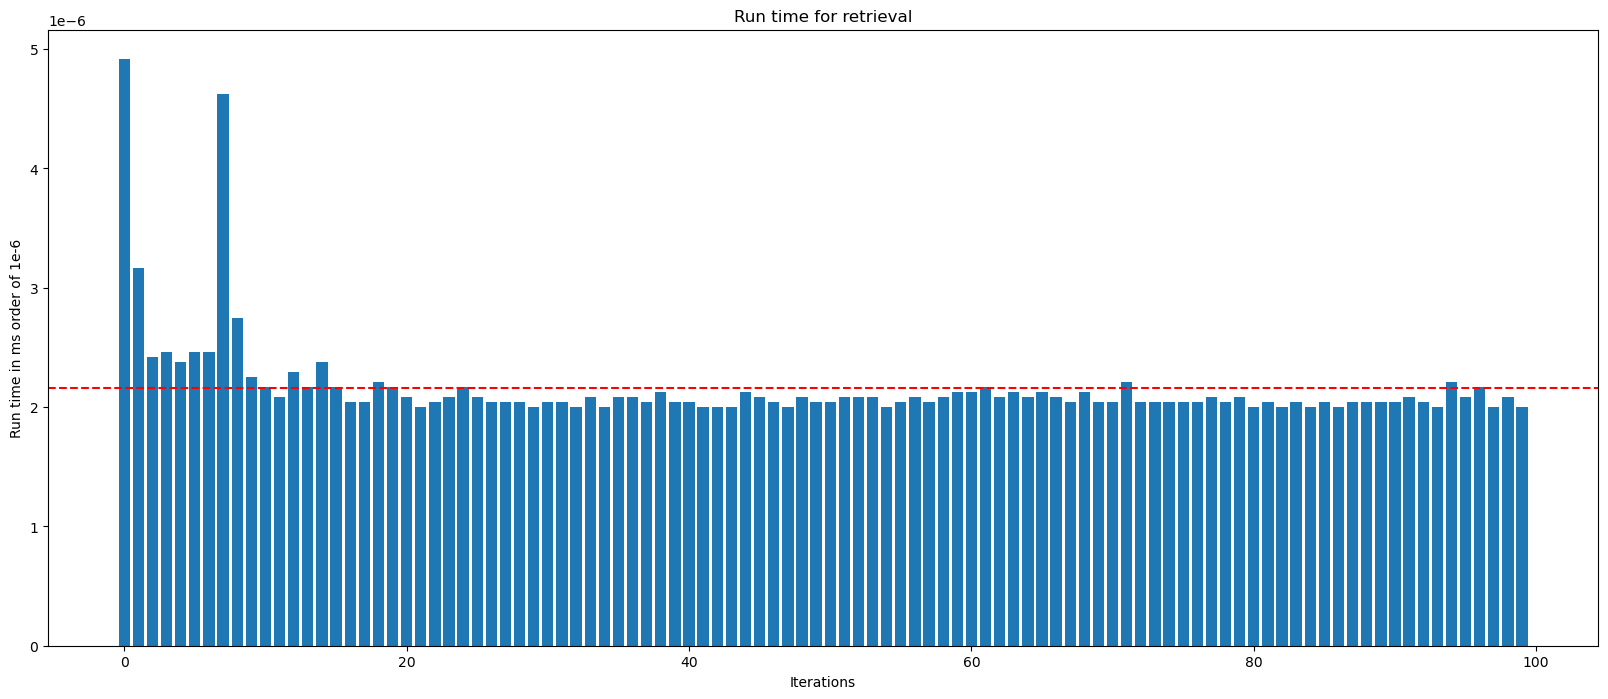

Found:  True


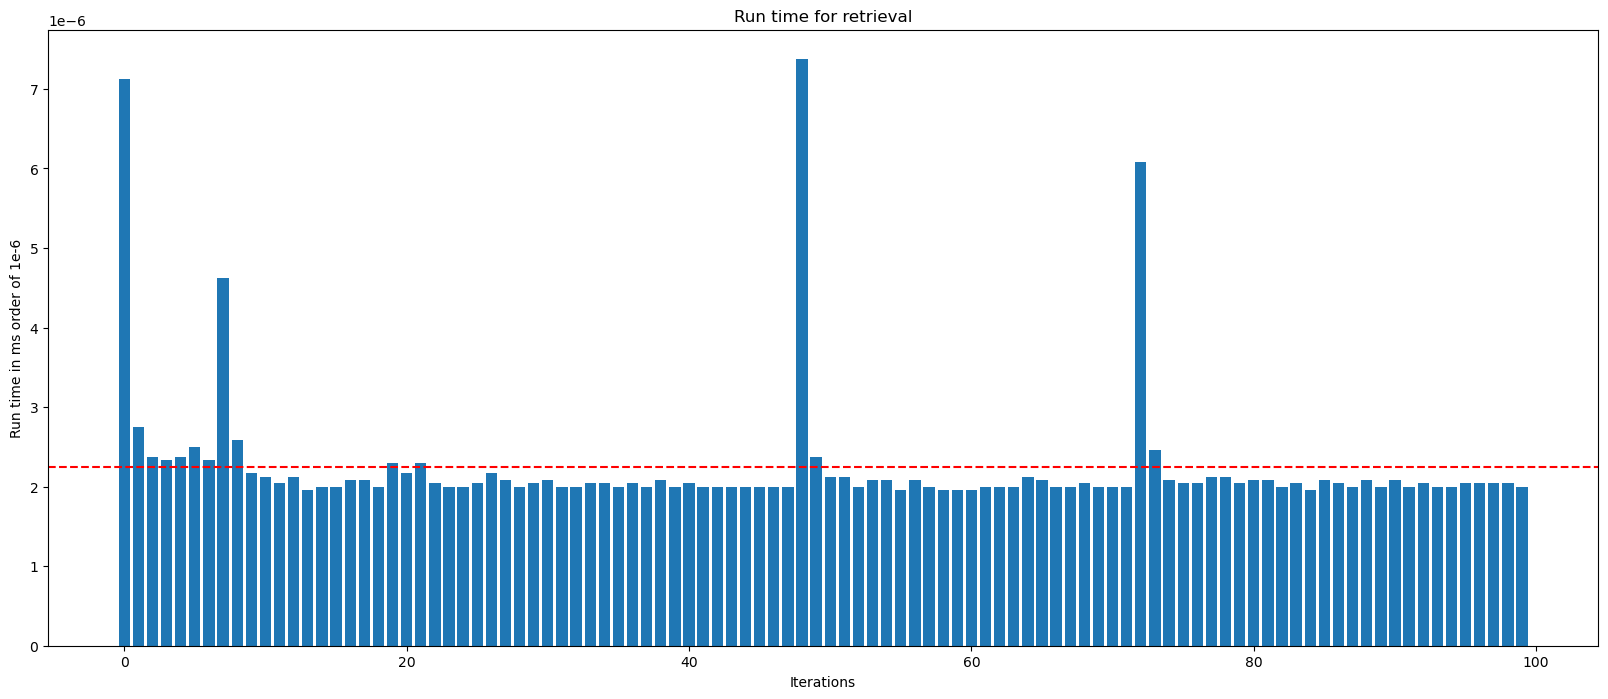

Found:  True


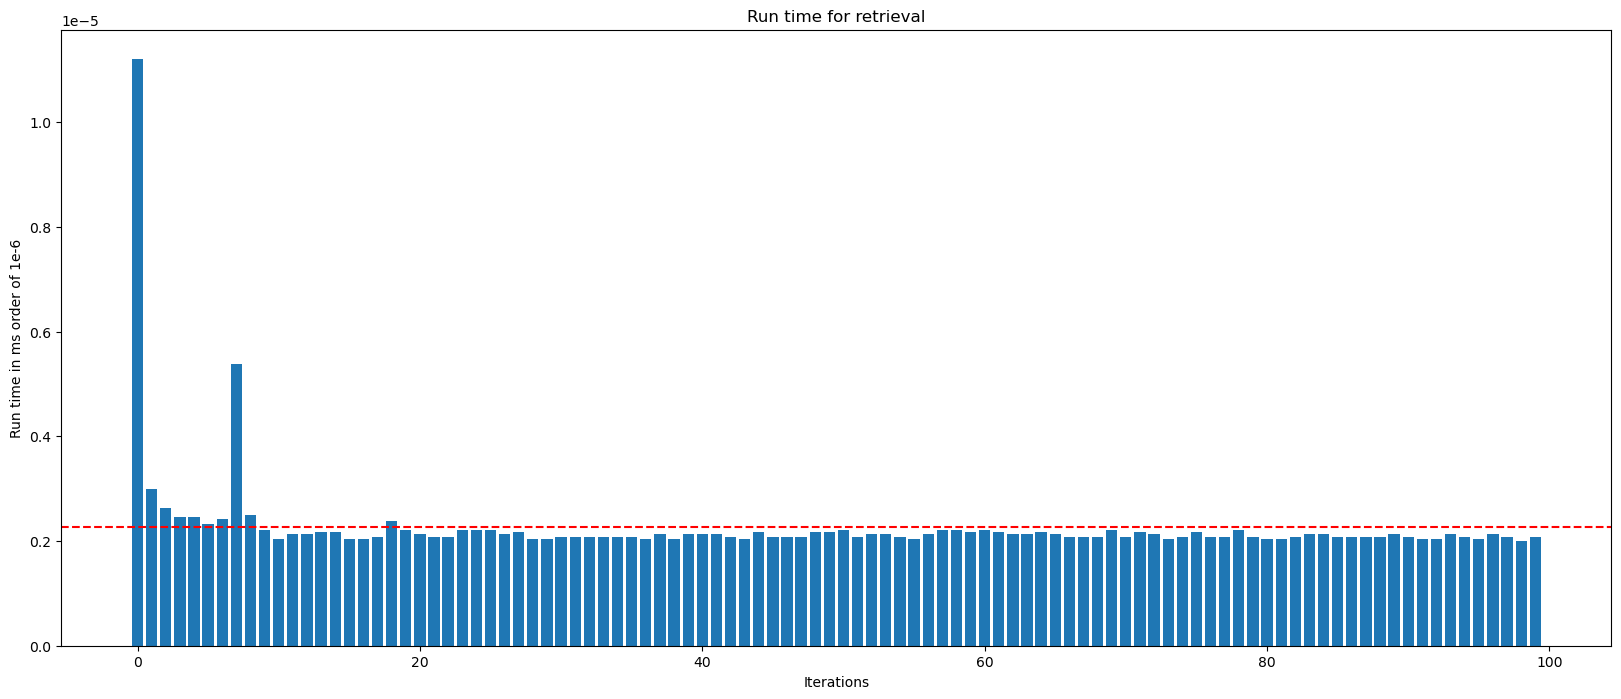

In [25]:
# binary search (even numbered list) when item is at the beginning of the list
my_list = create_custom_list(1000, 10000, 20, 0)
to_find = 20

run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_1(my_list.copy(), to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

run_times1 = []
for _ in range(runs):
    my_list.sort()
    start1 = timeit.default_timer()
    is_there1 = binary_search_2(my_list.copy(), to_find)
    stop1 = timeit.default_timer()
    run_times1.append(stop1-start1)
print("Found: ", is_there1)
draw_plot(run_times1)

run_times2 = []
for _ in range(runs):
    my_list.sort()
    start2 = timeit.default_timer()
    is_there2 = binary_search_3(my_list.copy(), to_find)
    stop2 = timeit.default_timer()
    run_times2.append(stop2-start2)
print("Found: ", is_there2)
draw_plot(run_times2)

Found:  False


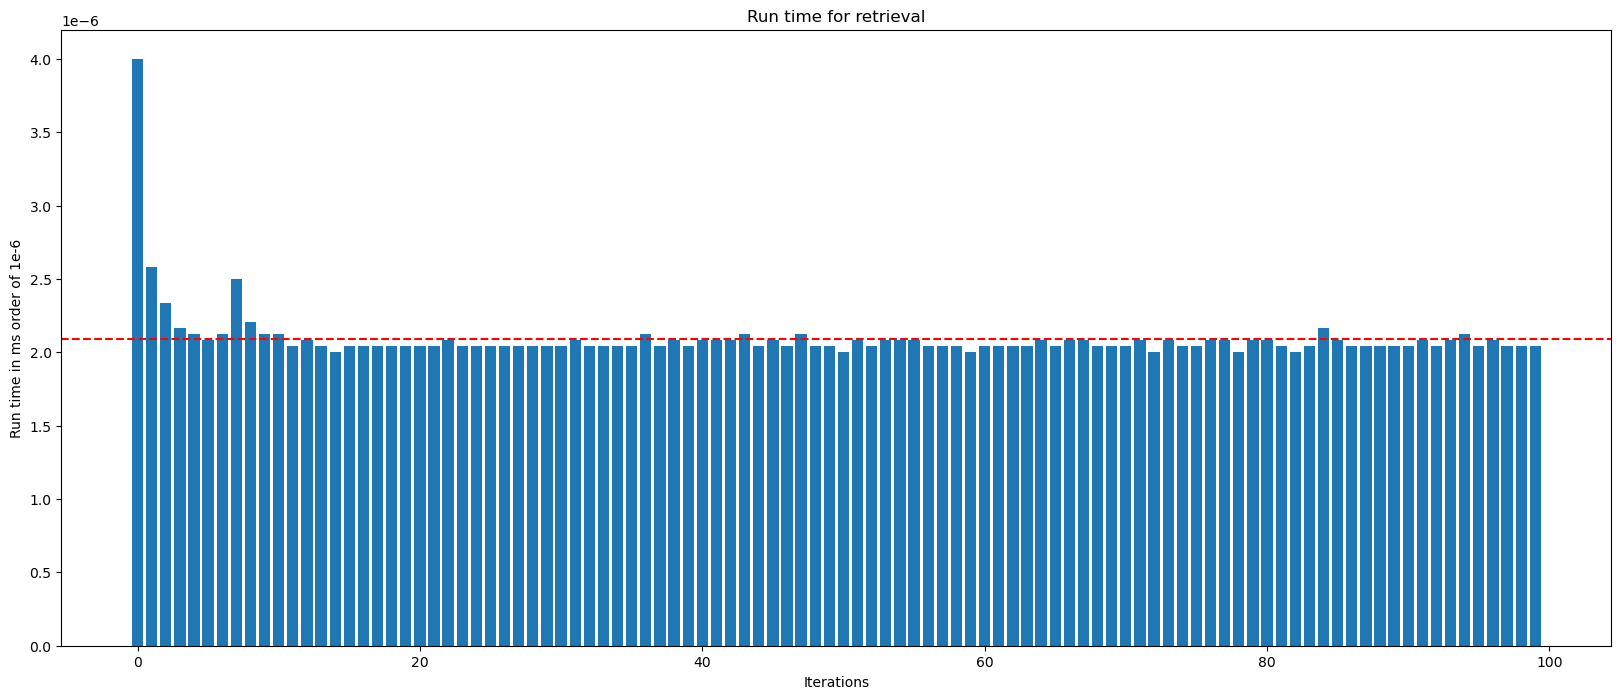

Found:  False


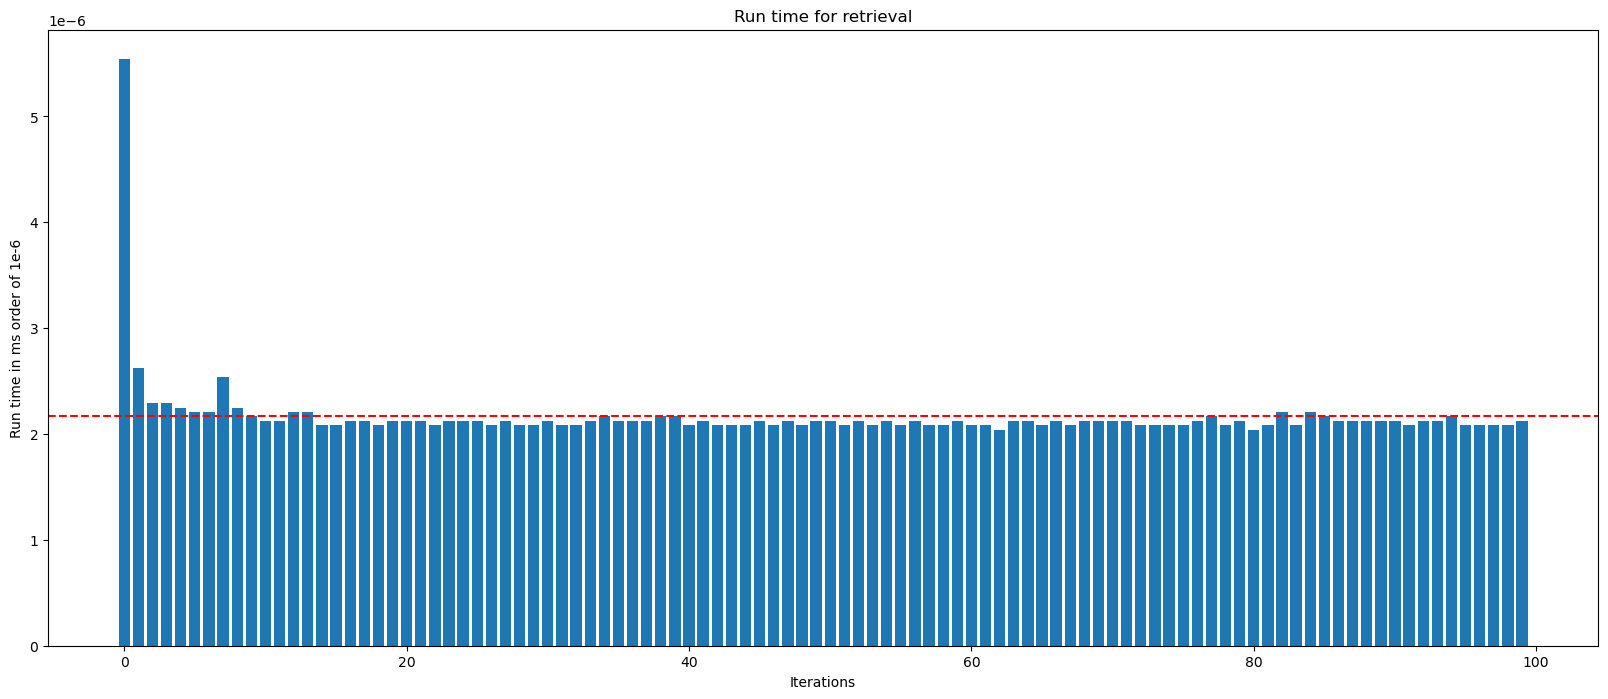

Found:  False


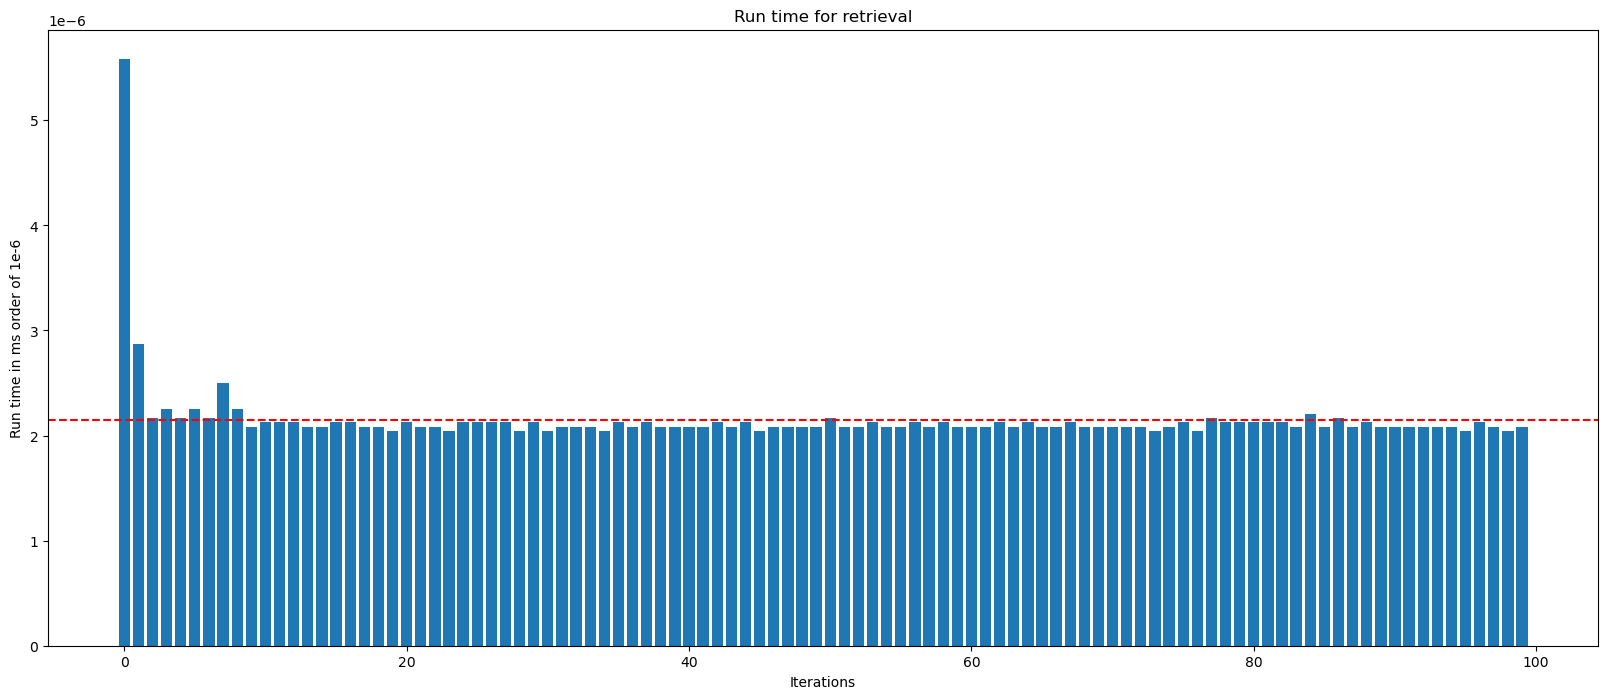

In [26]:
# binary search (odd numbered list) when item is at the end of the list


my_list = create_custom_list(1001, 10000, 980, 0)
to_find = 20

run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_1(my_list.copy(), to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

run_times1 = []
for _ in range(runs):
    my_list.sort()
    start1 = timeit.default_timer()
    is_there1 = binary_search_2(my_list.copy(), to_find)
    stop1 = timeit.default_timer()
    run_times1.append(stop1-start1)
print("Found: ", is_there1)
draw_plot(run_times1)

run_times2 = []
for _ in range(runs):
    my_list.sort()
    start2 = timeit.default_timer()
    is_there2 = binary_search_3(my_list.copy(), to_find)
    stop2 = timeit.default_timer()
    run_times2.append(stop2-start2)
print("Found: ", is_there2)
draw_plot(run_times2)

**Reflection**:


It seems that binary search seems to execute in nearly the same duration as the input size, in both cases when the key was located near the start or end of the list, the average compute time accross iterations was a little over 0.2 seconds.


---
---


### Part C


Recall that I discussed in the class, the possibility of "reducing the comparisons" in Binary Search implementation. One solution came up is to remove the comparison with "mid". If you design an experiment to test this, you will soon realize that while this speeds up the execution time by reducing the number of comparisons needed, it fails when the element to be searched is right in the middle. So are there any ways to improve the speed of Binary Search that is not dependent on data? The answer is recursion! In this section, implement a Binary Search recursively.


In [27]:
def binary_search_4(item_list, to_find):
    l, h = 0, len(item_list)-1
    return _binary_search_4(item_list, to_find, l, h)


def _binary_search_4(item_list, to_find, l, h):
    mid = (l+h)//2

    if item_list[mid] == to_find:
        return True

    if h - l < 2:
        return False
    if item_list[mid] < to_find:
        return _binary_search_4(item_list, to_find, mid+1, h)
    else:
        return _binary_search_4(item_list, to_find, l, mid - 1)

In [28]:
l = [i for i in range(100000)]
x = l[20]
print(x)
binary_search_4(l, x)

20


True

Run all the experiments in Part B comapring all 4 implementations under all 6 cases. Plot the timings, and describe the results in the below section. Write a short description of your observation; why is recursion better in this case?


Found:  True


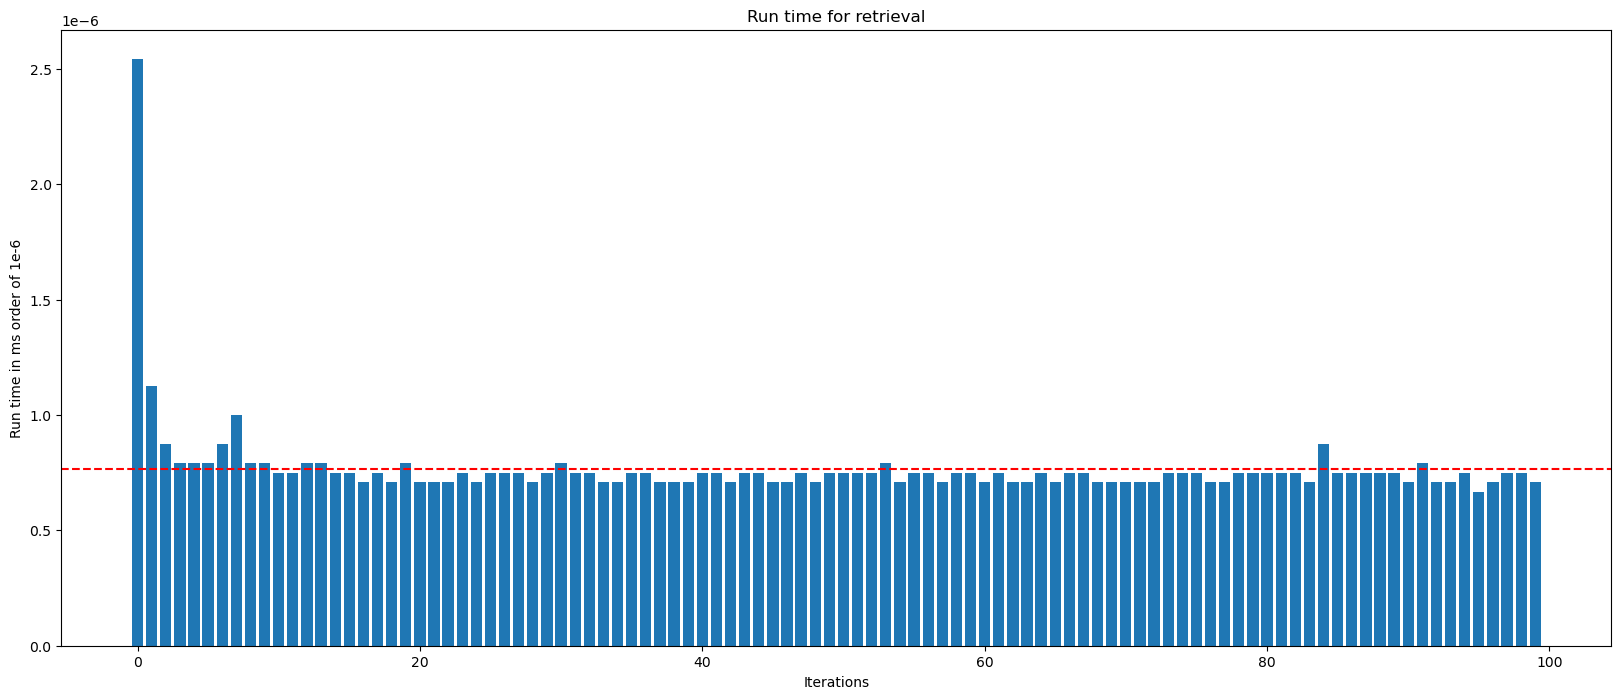

Found:  True


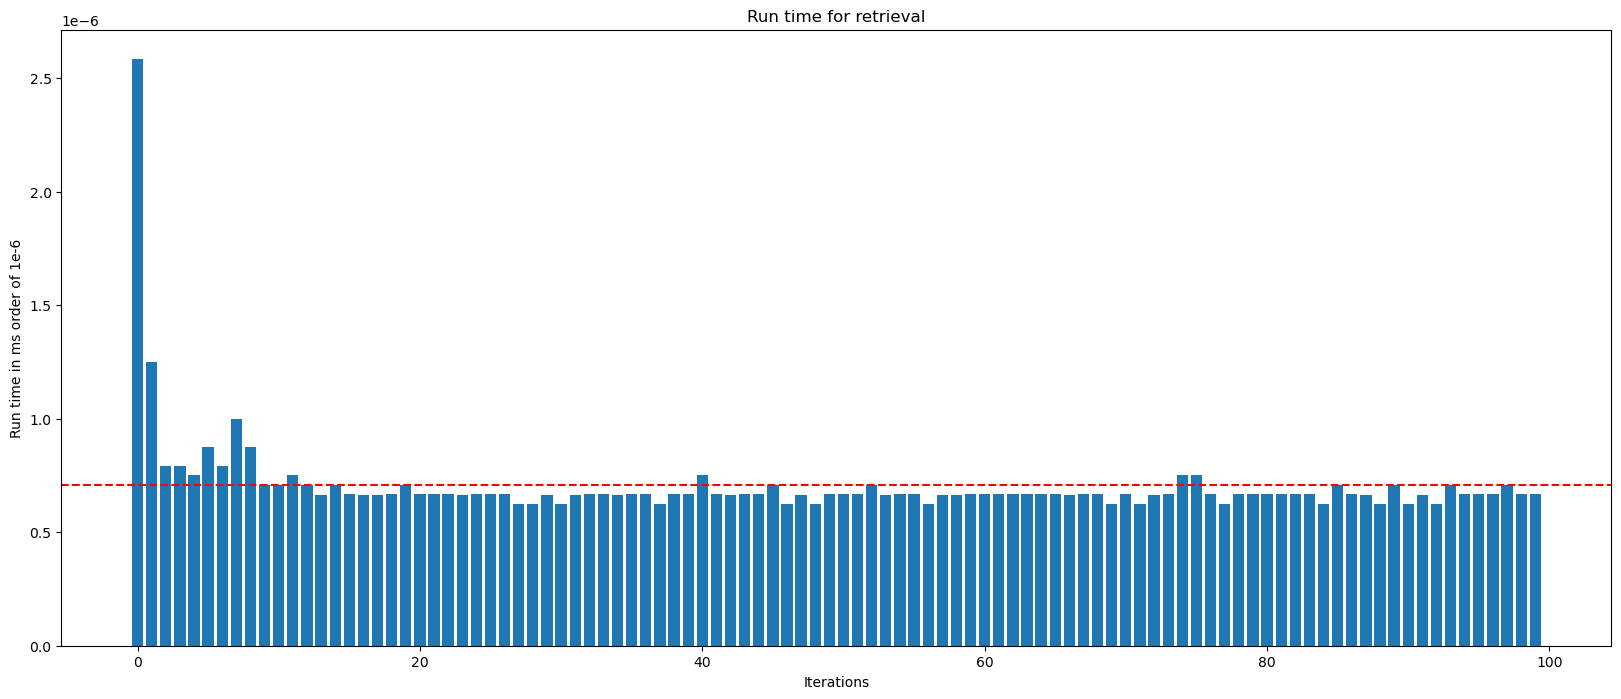

Found:  True


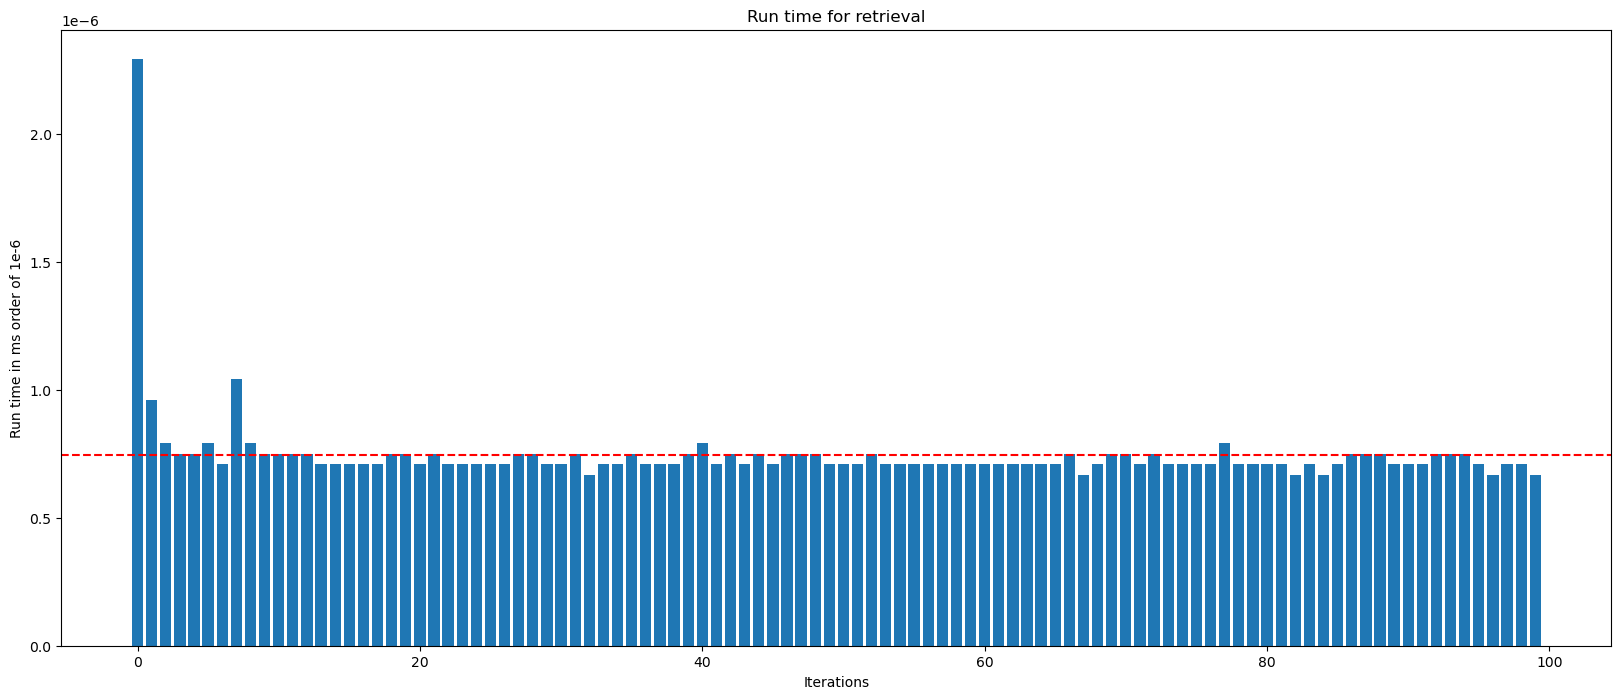

In [29]:
# your implementation and experiments go here.
# Binary_search_I + element in beginning

# Binary_search_I + element in mid

# Binary_search_I + element in end

my_list = create_custom_list(1000, 10000)
to_find = my_list[0]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_1(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

my_list = create_custom_list(1000, 10000)
to_find = my_list[1000//2]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_1(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

my_list = create_custom_list(1000, 10000)
to_find = my_list[1000-1]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_1(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

Found:  True


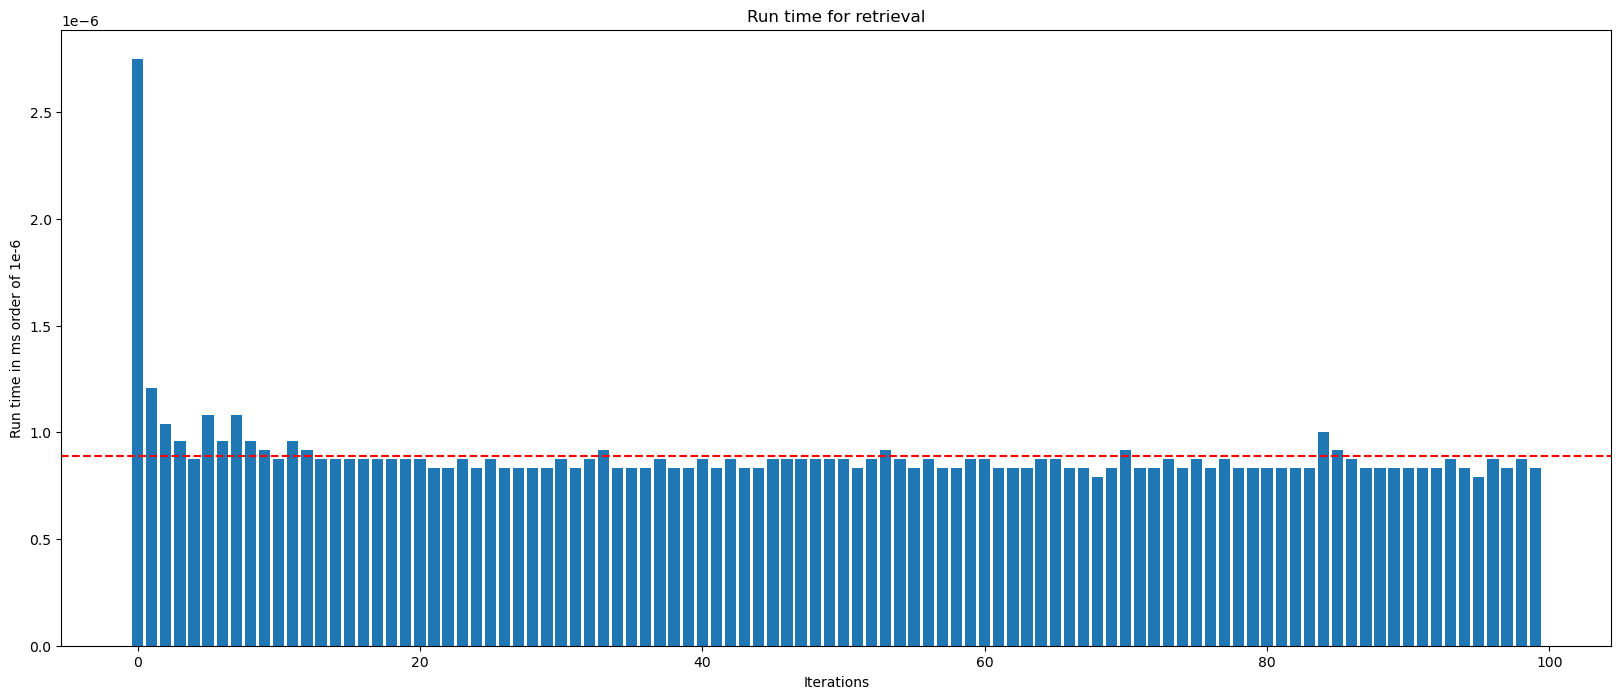

Found:  True


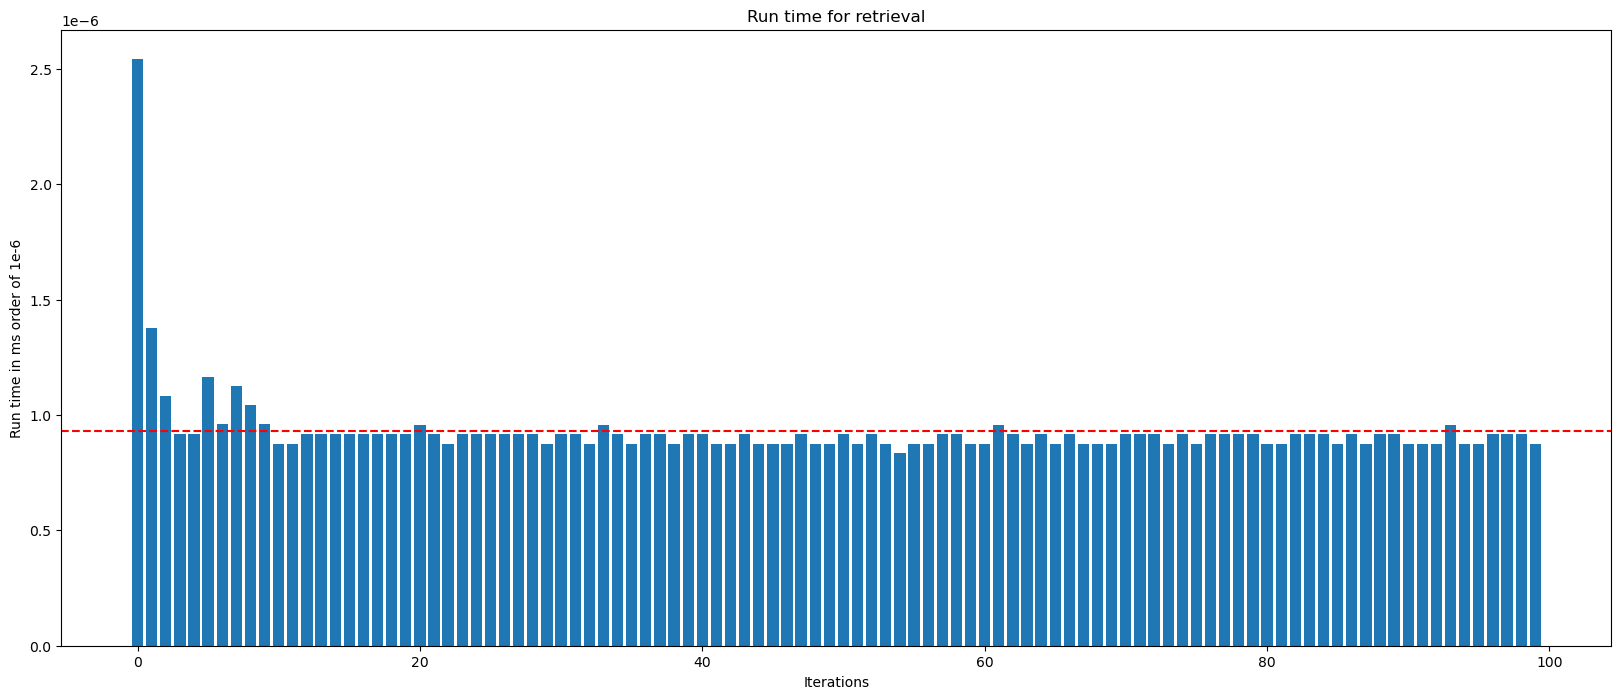

Found:  True


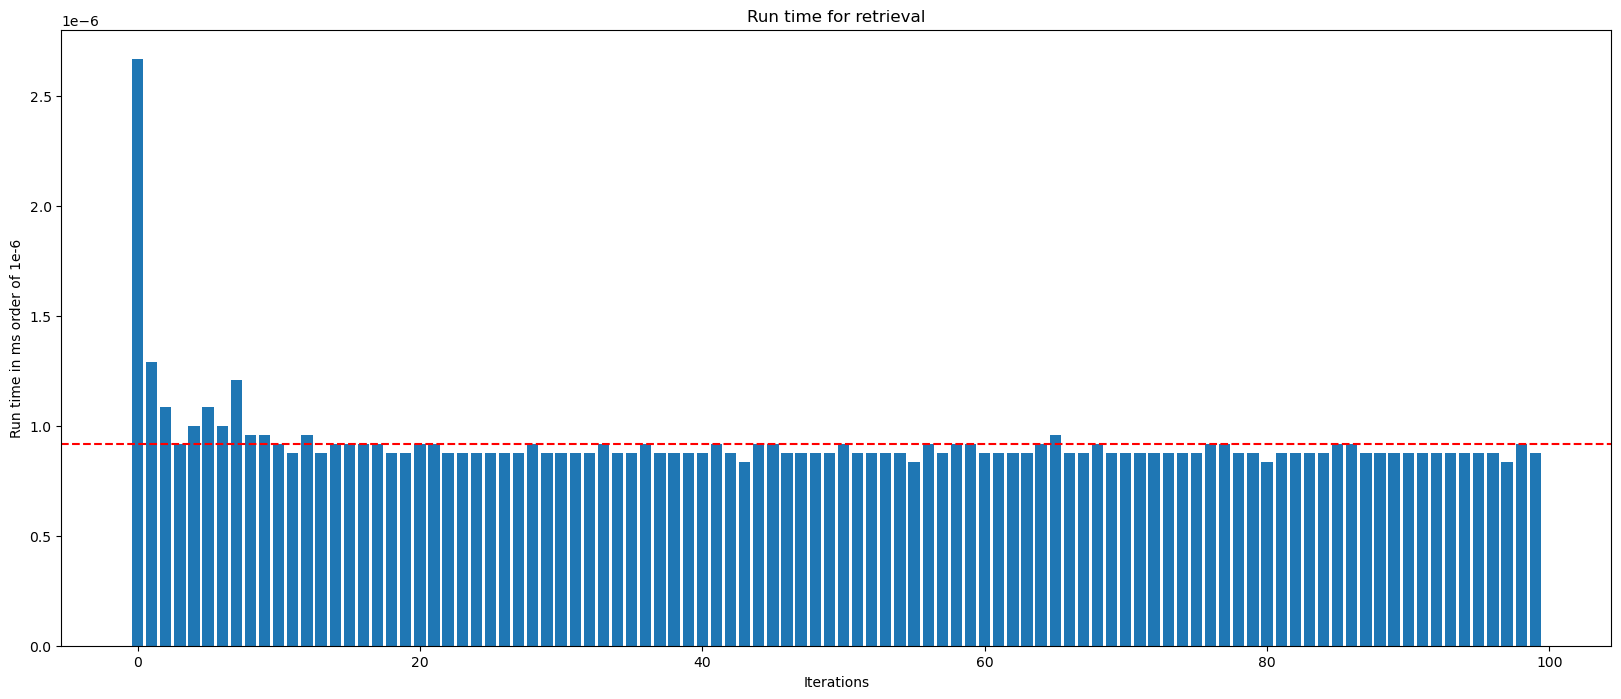

In [30]:
# Binary_search_II + element in beginning

# Binary_search_II + element in mid

# Binary_search_II + element in end

my_list = create_custom_list(1000, 10000)
to_find = my_list[0]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_2(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

my_list = create_custom_list(1000, 10000)
to_find = my_list[1000//2]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_2(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

my_list = create_custom_list(1000, 10000)
to_find = my_list[1000-1]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_2(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

Found:  True


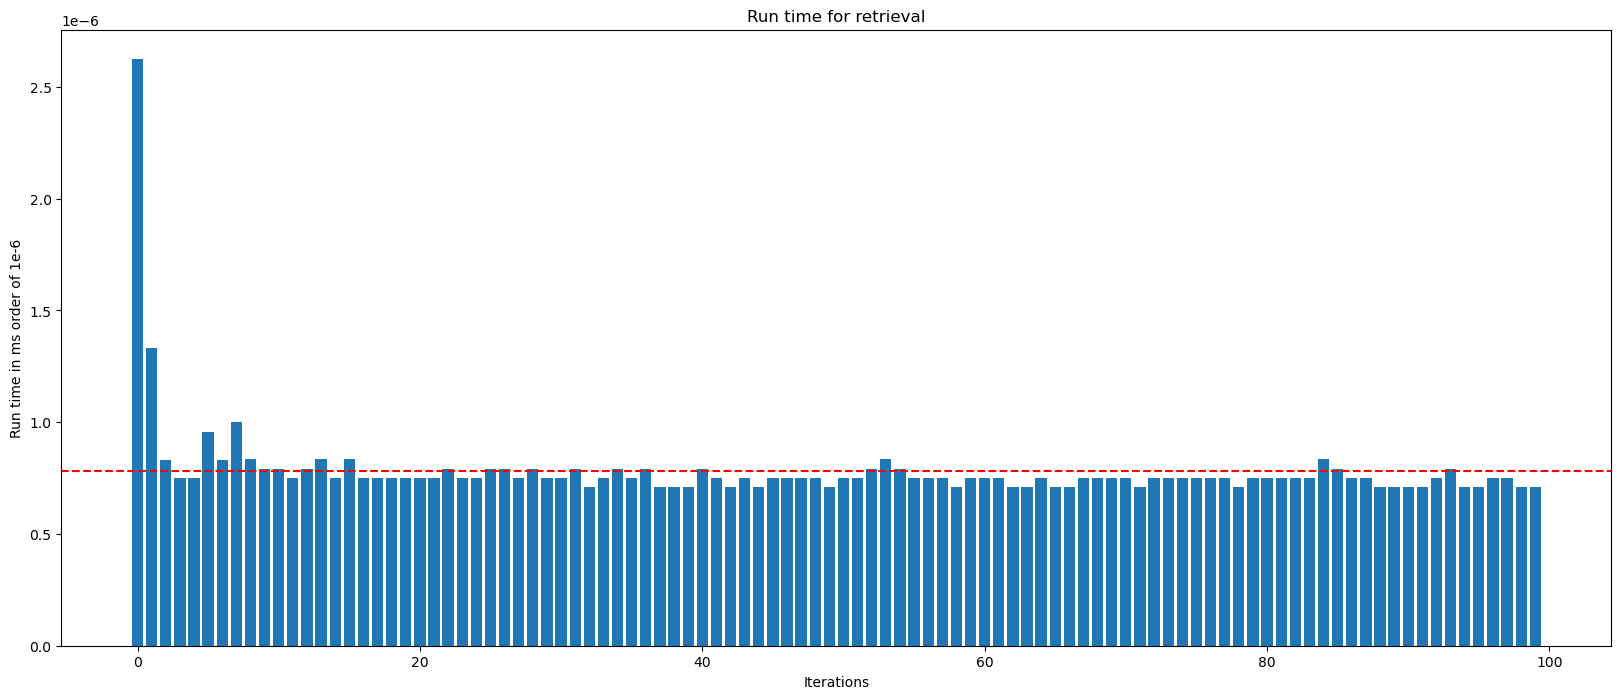

Found:  True


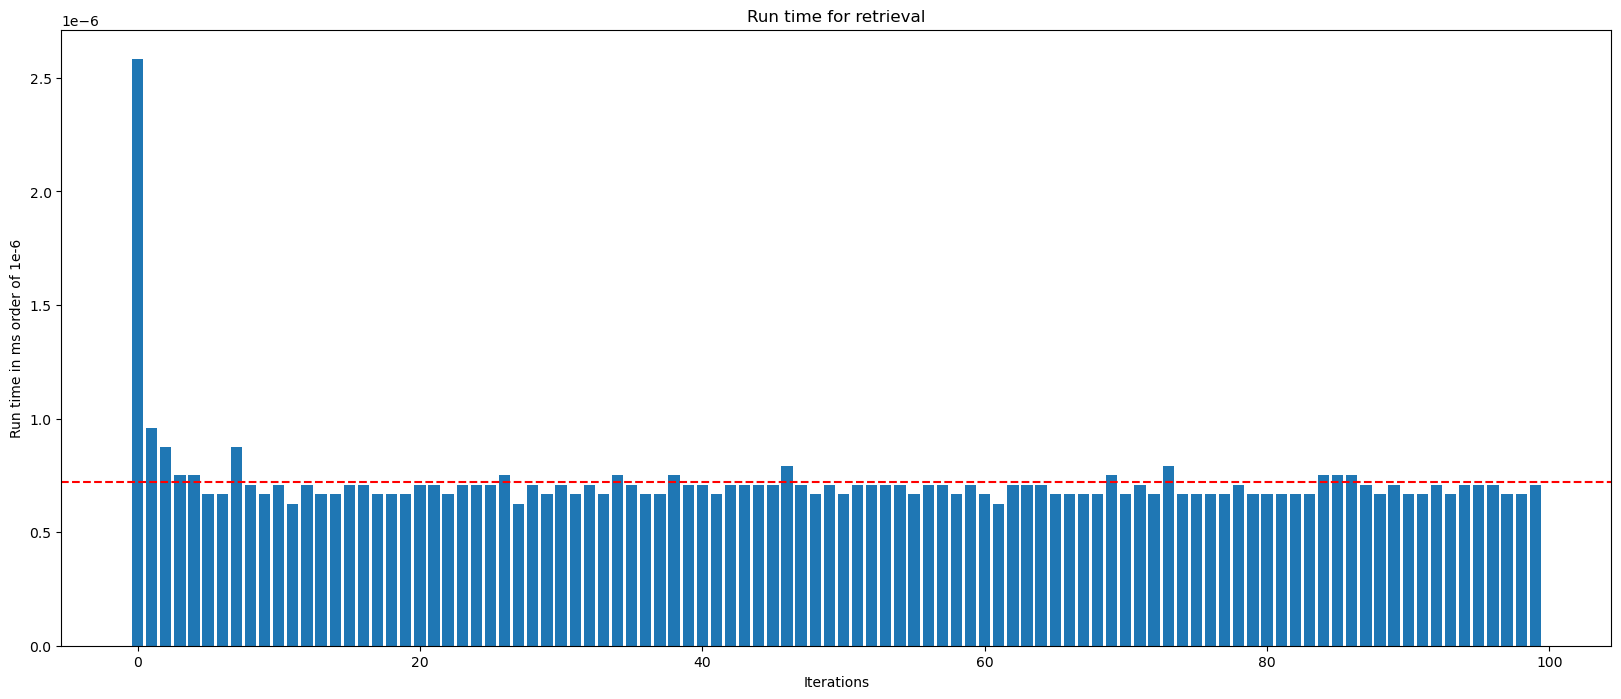

Found:  True


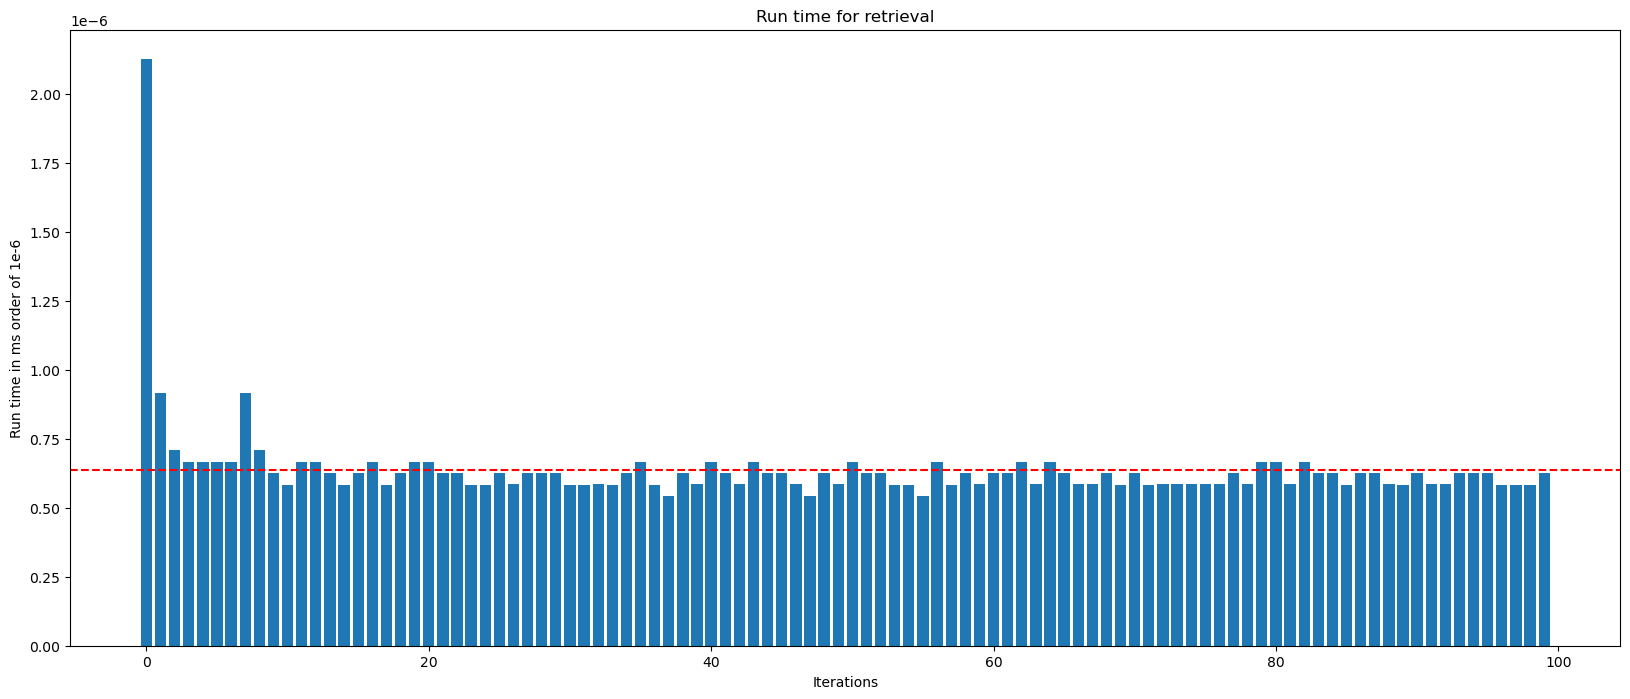

In [31]:
# Binary_search_III + element in beginning

# Binary_search_III + element in mid

# Binary_search_III + element in end

my_list = create_custom_list(1000, 10000)
to_find = my_list[0]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_3(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

my_list = create_custom_list(1000, 10000)
to_find = my_list[1000//2]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_3(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

my_list = create_custom_list(1000, 10000)
to_find = my_list[1000-1]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_3(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

Found:  True


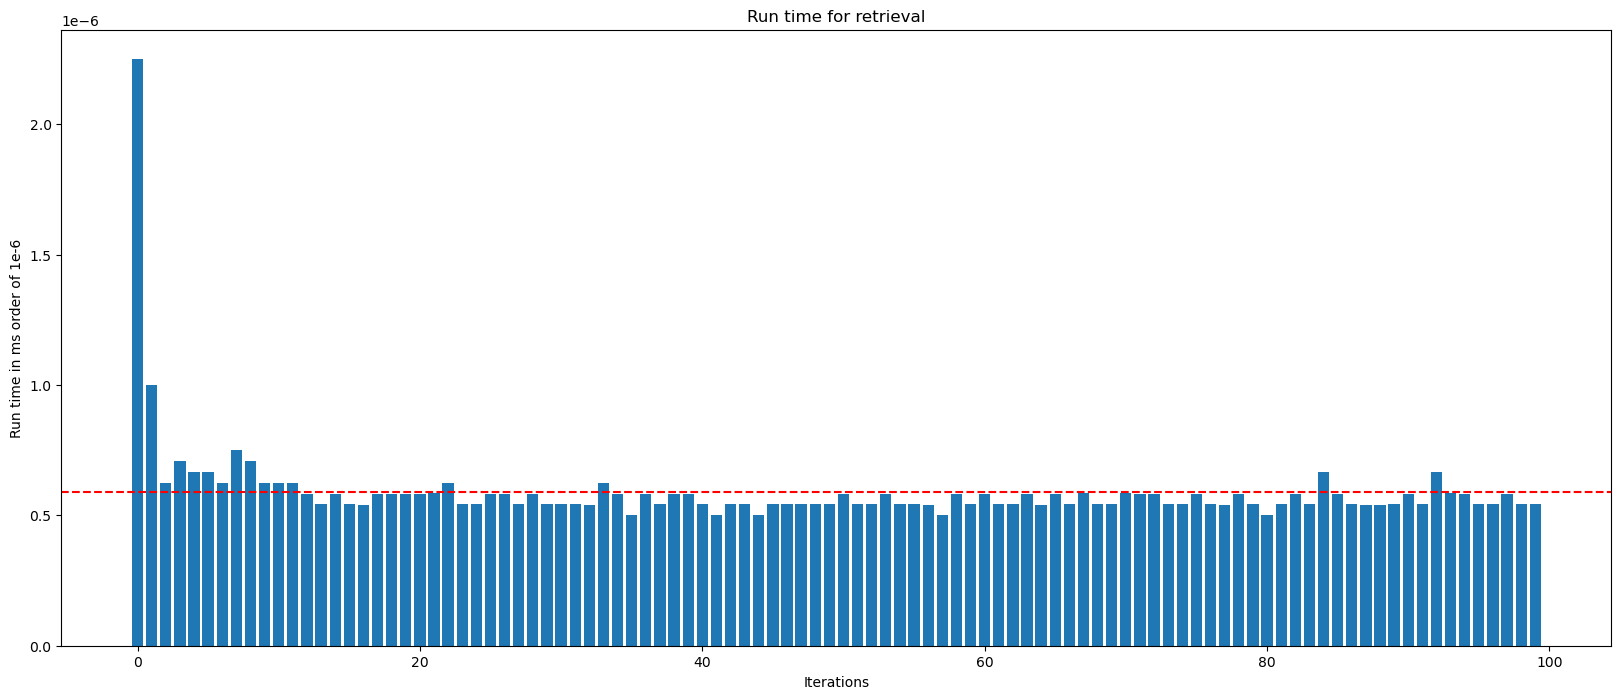

Found:  True


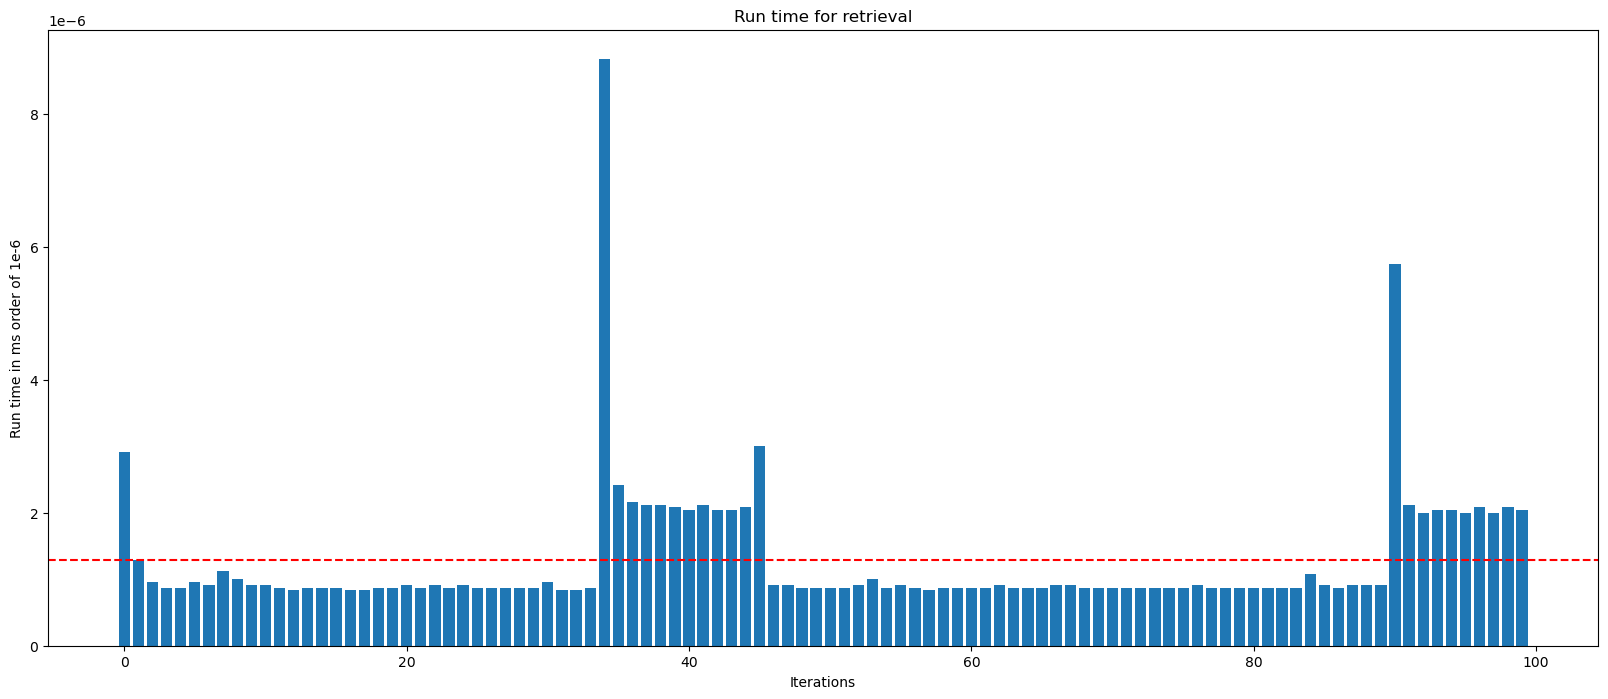

Found:  True


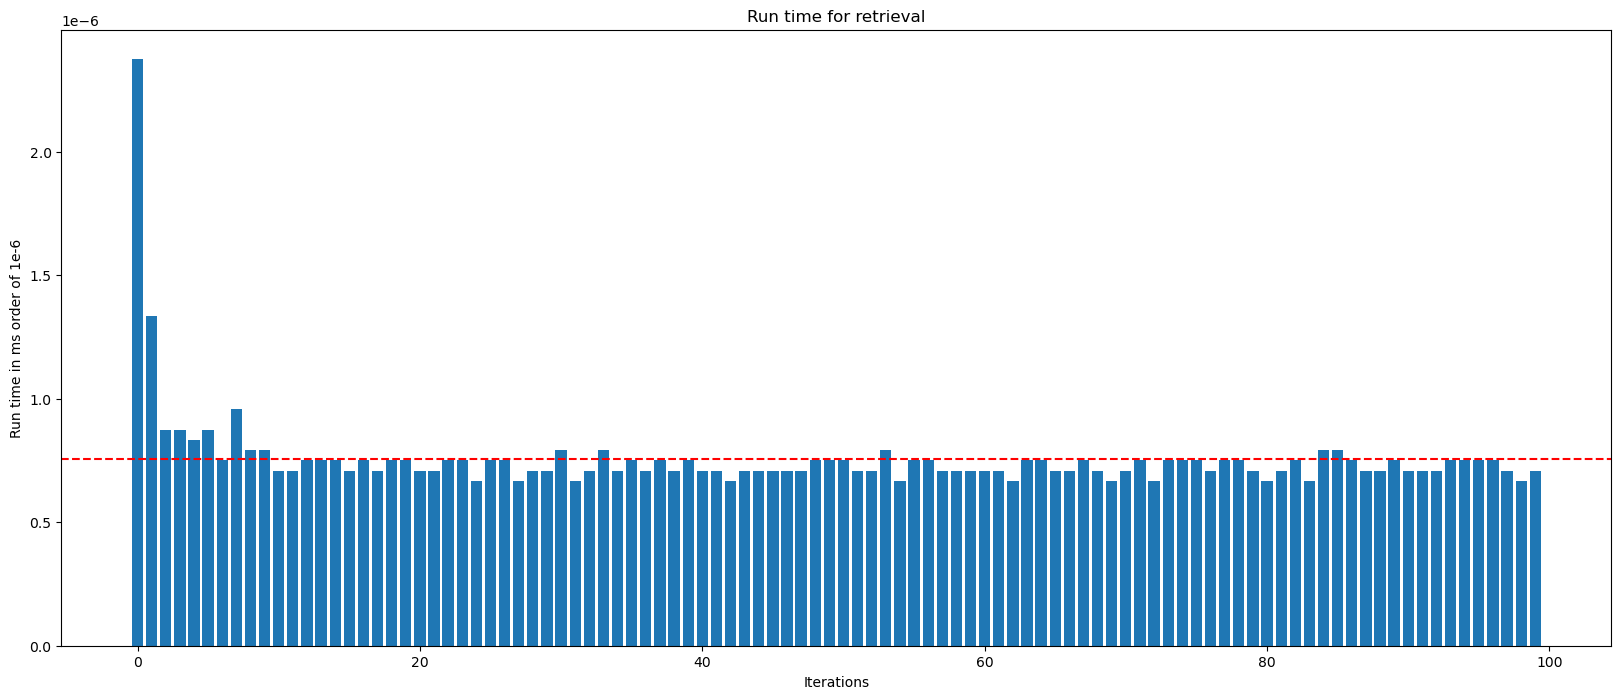

In [32]:
# In the class we also discussed a round up and round down implementation of binary search. The next experiment is to test how these two implementations offer up advantage for both even and odd length list.


# Binary_search_I + list with even length

# Binary_search_II + list with even length

# Binary_search_III + list with even length

my_list = create_custom_list(1000, 10000)
to_find = my_list[50]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_1(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

my_list = create_custom_list(1000, 10000)
to_find = my_list[50]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_2(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

my_list = create_custom_list(1000, 10000)
to_find = my_list[50]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_3(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

Found:  True


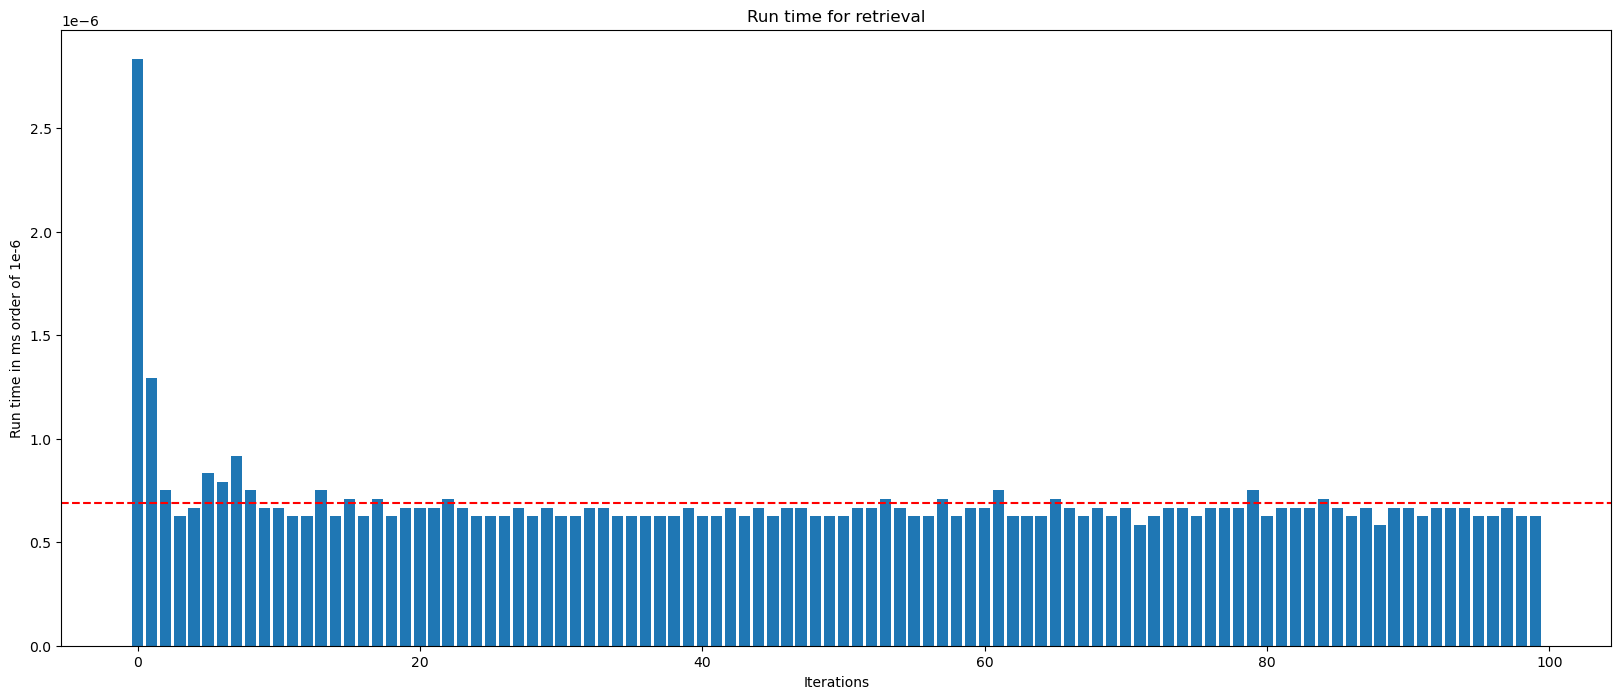

Found:  True


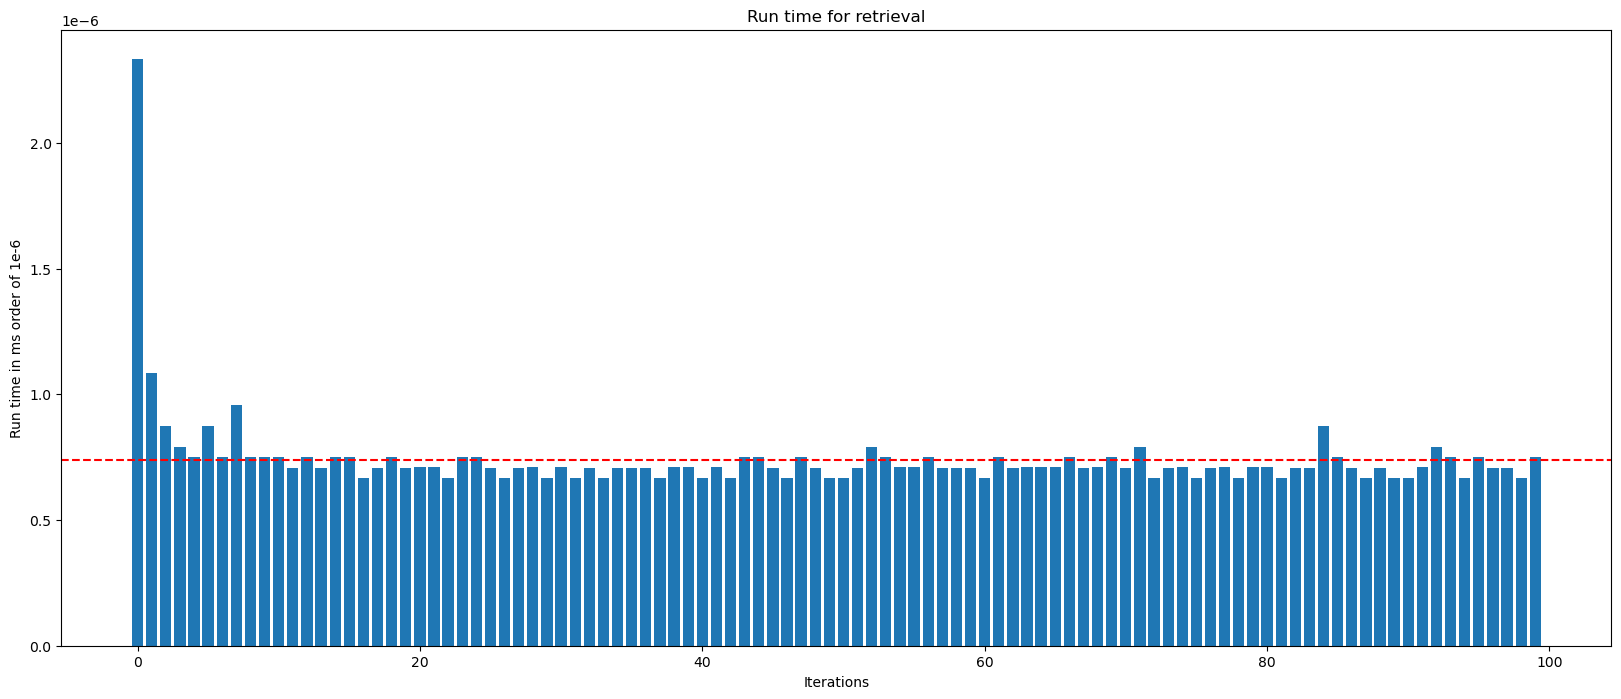

Found:  True


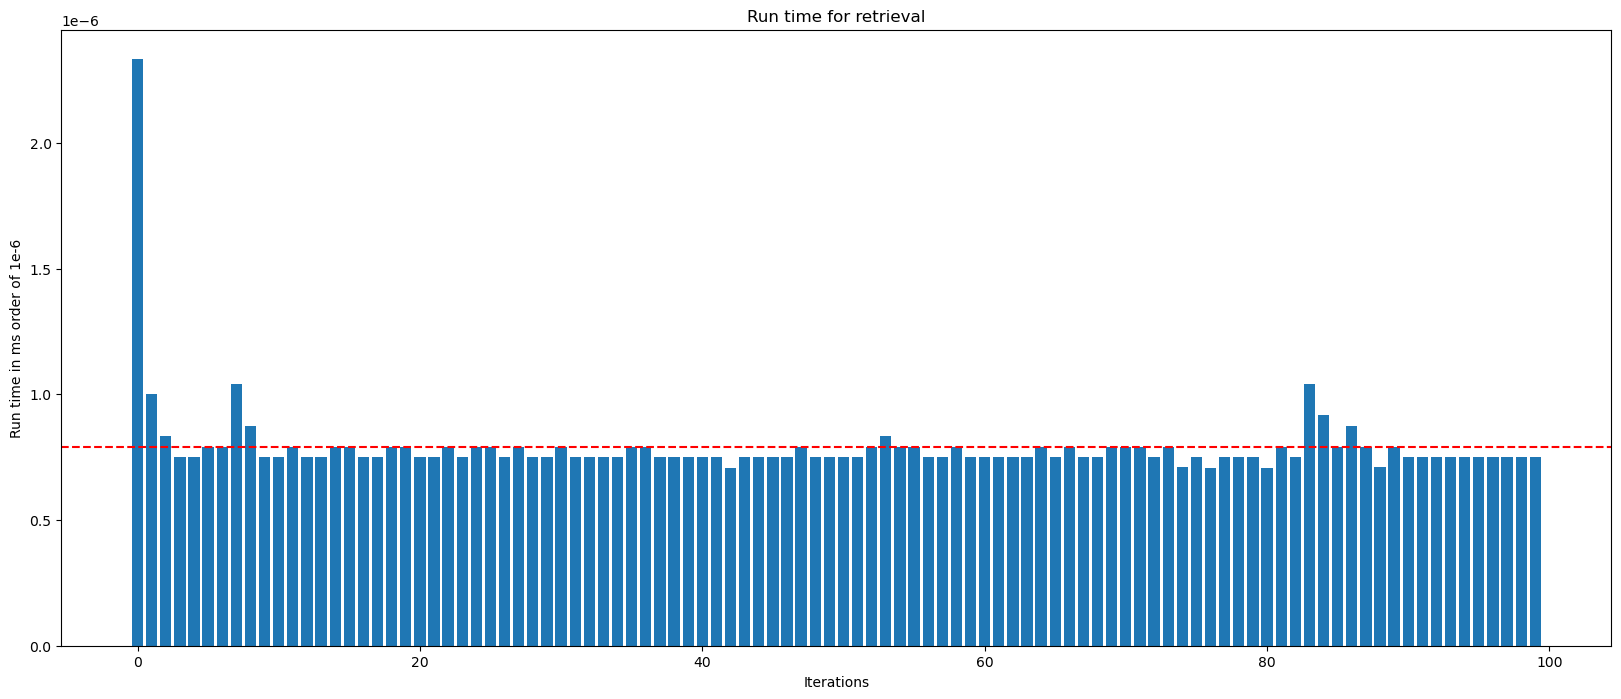

In [33]:
# Binary_search_I + list with odd length

# Binary_search_II + list with odd length

# Binary_search_III + list with odd length

my_list = create_custom_list(1001, 10000)
to_find = my_list[50]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_1(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

my_list = create_custom_list(1001, 10000)
to_find = my_list[50]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_2(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

my_list = create_custom_list(1001, 10000)
to_find = my_list[50]
run_times = []
for _ in range(runs):
    my_list.sort()
    start = timeit.default_timer()
    is_there = binary_search_3(my_list, to_find)
    stop = timeit.default_timer()
    run_times.append(stop-start)
print("Found: ", is_there)
draw_plot(run_times)

##### Result Discussion:


---
---


It seems that on average, binary search is able to find elements in the middle, end or beginning of a list, with odd and even numbered lists, the four different implementations however have different


### PART D


Now that you are comfortable in designing experiments, in this section, use the implementations of **Heap**, **Merge**, and **Quick** sort discussed in class and run suitable experiments to compare the runtimes of these three algorithms.

Hint: it should become clear where Quick sort gets its name.


In [34]:
# heap from class notes
class Heap:
    def __init__(self):
        self.items = []
        self.length = len(self.items)

    def find_left_index(self, index):
        return 2 * (index + 1) - 1

    def find_right_index(self, index):
        return 2 * (index + 1)

    def find_parent_index(self, index):
        return (index + 1) // 2 - 1

    def heapify(self, index):
        largest_known_index = index
        left_index = self.find_left_index(index)
        right_index = self.find_right_index(index)

        if left_index < self.length and self.items[left_index] > self.items[index]:
            largest_known_index = left_index
        if right_index < self.length and self.items[right_index] > self.items[largest_known_index]:
            largest_known_index = right_index
        if largest_known_index != index:
            self.items[index], self.items[largest_known_index] = self.items[largest_known_index], self.items[index]
            self.heapify(largest_known_index)

    def bubble_up(self, index):
        parent_index = self.find_parent_index(index)

        while index > 0 and self.items[index] > self.items[parent_index]:
            self.items[index], self.items[parent_index] = self.items[parent_index], self.items[index]
            self.bubble_up(parent_index)

    def insert_value(self, value):
        if self.length == len(self.items):
            self.items.append(value)
        else:
            self.items[self.length - 1]
        self.length += 1
        self.bubble_up(self.length-1)

    def extract_max(self,):
        self.items[0], self.items[self.length -
                                  1] = self.items[self.length-1], self.items[0]
        max_value = self.items[self.length-1]
        self.length -= 1
        self.heapify(0)
        return max_value

In [35]:
# your implementation and experiments go here.
def _merge(arr, start, mid, end):
    start2 = mid + 1

    # If the direct merge is already sorted
    if arr[mid] <= arr[start2]:
        return

    # Two pointers to maintain start of both arrays to merge
    while start <= mid and start2 <= end:
        # If element 1 is in right place
        if arr[start] <= arr[start2]:
            start += 1
        else:
            value = arr[start2]
            index = start2

            # Shift all the elements between element 1 and element 2, right by 1.
            while index != start:
                arr[index] = arr[index - 1]
                index -= 1

            arr[start] = value

            # Update all the pointers
            start += 1
            mid += 1
            start2 += 1


def _merge_sort(arr, l, r):
    if l < r:
        m = l + (r - l) // 2

        # Sort first and second halves
        _merge_sort(arr, l, m)
        _merge_sort(arr, m + 1, r)

        _merge(arr, l, m, r)


def merge_sort(arr):
    r = 0
    l = len(arr)
    _merge_sort(arr, r, l - 1)
    return arr


def _quick_sort_partition(arr, low, high):
    # Select the pivot element
    pivot = arr[high]
    i = low - 1

    # Put the elements smaller than pivot on the left and greater than pivot on the right of pivot
    for j in range(low, high):
        if arr[j] <= pivot:
            i = i + 1
            arr[i], arr[j] = arr[j], arr[i]

    # Put the pivot element in its proper place
    arr[i + 1], arr[high] = arr[high], arr[i + 1]

    return i + 1


def _quick_sort(arr, l, h):
    if l < h:
        # Partition the array
        pivot = _quick_sort_partition(arr, l, h)

        # Sort the partitions
        _quick_sort(arr, l, pivot - 1)
        _quick_sort(arr, pivot + 1, h)


def quick_sort(arr):
    n = len(arr)
    _quick_sort(arr, 0, n - 1)
    return arr


def heap_sort(arr):
    h = Heap()
    for i in arr:
        h.insert_value(i)

    n = len(arr)
    for i in range(n - 1, -1, -1):
        arr[i] = h.extract_max()


def _heapify(arr, n, i):
    # Find largest among root, left child and right child
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[i] < arr[l]:
        largest = l

    if r < n and arr[largest] < arr[r]:
        largest = r

    # Swap and continue heapifying if root is not largest
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        _heapify(arr, n, largest)

## Experiment outline

We will test the above functions along a range of inputs ranging from 100-5000 elements, in batches of 100 runs to minimize error.
Each element i in the arrays to be sorted will be within 0 <= i <= n where n is the number of elements in the array

All functions sort the arrays in place, and will be evaluated on the **exact same** input arrays


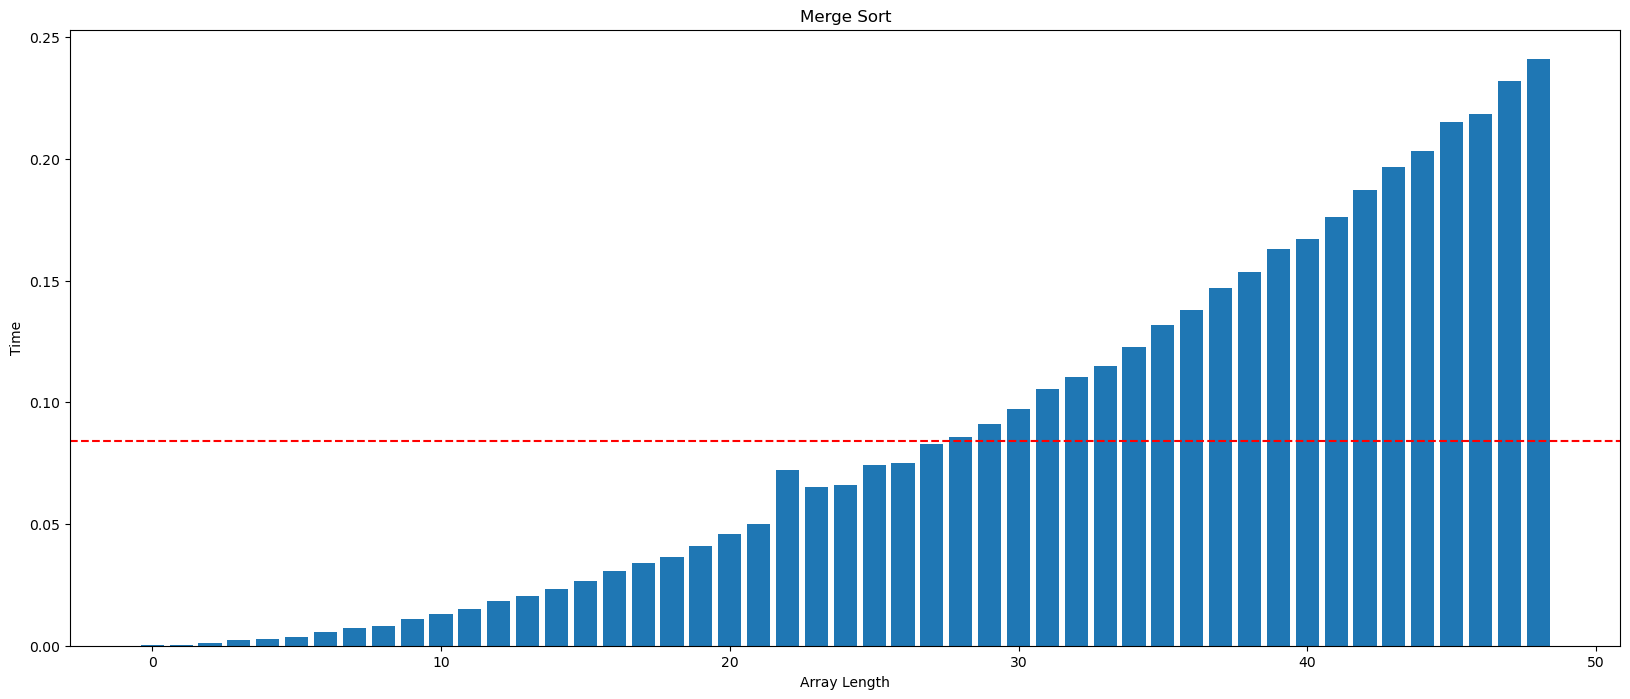

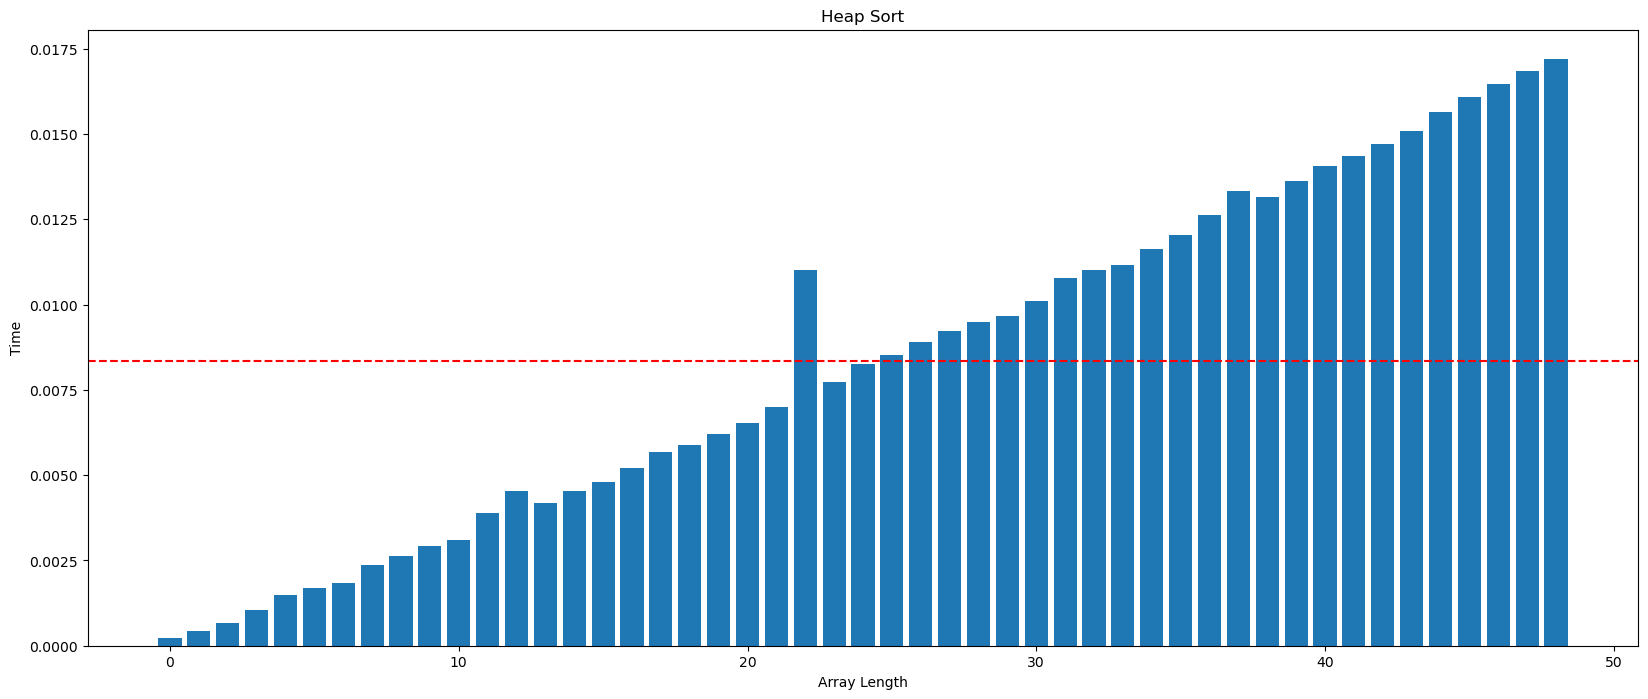

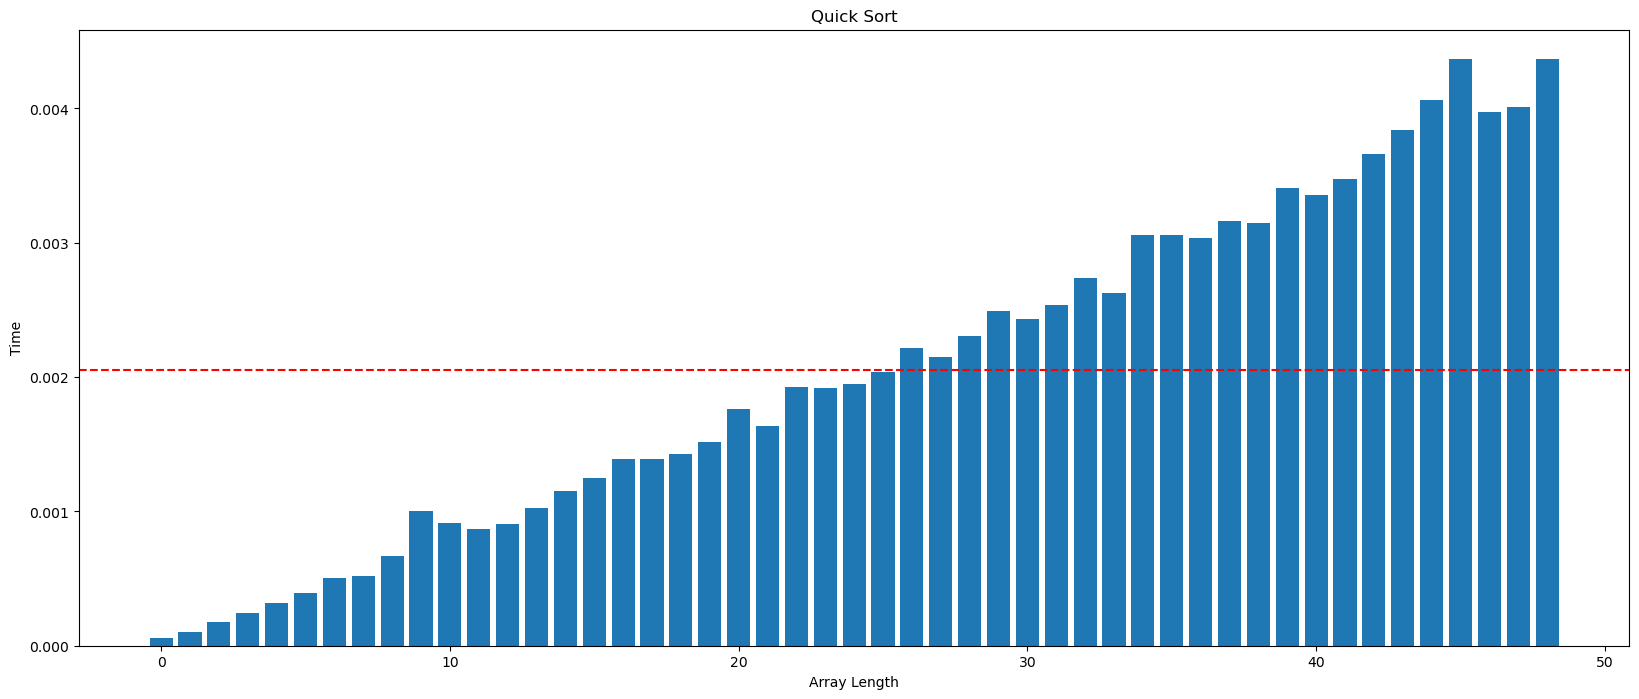

In [36]:
# Cell takes ~5s to run on Apple M1 Pro CPU

merge_sort_run_arr = []
heap_sort_run_arr = []
quick_sort_run_arr = []
sizes = np.arange(100, 5000, 100)
for i in sizes:
    # we create 3 copies of the same list to sort using 3 different algorithms
    # since all the algorithms modify the list in place
    random_arr = create_custom_list(i, i)
    random_arr1 = random_arr.copy()
    random_arr2 = random_arr.copy()

    # we time each algorithm
    merge_delta = timeit.timeit(lambda: merge_sort(random_arr), number=1)
    heap_delta = timeit.timeit(lambda: heap_sort(random_arr1), number=1)
    quick_delta = timeit.timeit(lambda: quick_sort(random_arr2), number=1)

    # we append the time taken to the run_arr
    merge_sort_run_arr.append(merge_delta)
    heap_sort_run_arr.append(heap_delta)
    quick_sort_run_arr.append(quick_delta)


# we plot the run_arr

draw_plot_custom(merge_sort_run_arr, "Merge Sort", "Array Length", "Time")
draw_plot_custom(heap_sort_run_arr, "Heap Sort", "Array Length", "Time")
draw_plot_custom(quick_sort_run_arr, "Quick Sort", "Array Length", "Time")

In this section, provide a detailed outline of:

- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.


For this experiment, I choose to create lists of varying lengths from 100 - 5000, and tested the runtime of one iteration of each algorithm. To speed up the cell, I chose to only run each algorithm on each size array one time, since in order to see a trend, we would only need to see a correlation between runtime and array length.


# Reflection

It's clear that quicksort is the fastest sorting algorithm, especially as the size of the array increases. Merge sort is orders of magnitude slower than quicksort and heapsort, while quicksort is about 2-4x faster than heapsort on average


---
---


### PART E


E1. In previous experiments you also saw that not all algorithms are suitable for all scenarios. For instance, Merge Sort is better than Quick sort for certain situations. In this section, design a experiment to compare the scenarios where Merge Sort is better/worse than Quick Sort. You can use the traditional version of Merge Sort or use improved version ( maybe via recursion) to compare this performance.


In [37]:
# your implementation and experiments go here.
# source_random_arr = create_custom_list(10, 1000)


def test_merge_sort(n):
    merge_sort([i for i in range(n)])


def test_quick_sort(n):
    quick_sort([i for i in range(n)])


merge_deltas = []
quick_deltas = []

merge_delta = timeit.timeit(lambda: test_merge_sort(2), number=10000)
quick_delta = timeit.timeit(lambda: test_quick_sort(2), number=10000)
print("Merge Sort (2 elements): ", merge_delta)
print("Quick Sort (2 elements): ", quick_delta)
merge_deltas.append(merge_delta)
quick_deltas.append(quick_delta)

merge_delta = timeit.timeit(lambda: test_merge_sort(5), number=10000)
quick_delta = timeit.timeit(lambda: test_quick_sort(5), number=10000)
print("Merge Sort (5 elements): ", merge_delta)
print("Quick Sort (5 elements): ", quick_delta)
merge_deltas.append(merge_delta)
quick_deltas.append(quick_delta)

merge_delta = timeit.timeit(lambda: test_merge_sort(10), number=10000)
quick_delta = timeit.timeit(lambda: test_quick_sort(10), number=10000)
print("Merge Sort (10 elements): ", merge_delta)
print("Quick Sort (10 elements): ", quick_delta)
merge_deltas.append(merge_delta)
quick_deltas.append(quick_delta)

print("Merge Sort (100 elements): ", merge_delta)
print("Quick Sort (100 elements): ", quick_delta)
merge_deltas.append(merge_delta)
quick_deltas.append(quick_delta)

merge_delta = timeit.timeit(lambda: test_merge_sort(1000), number=100)
quick_delta = timeit.timeit(lambda: test_quick_sort(1000), number=100)
print("Merge Sort (1000 elements): ", merge_delta)
print("Quick Sort (1000 elements): ", quick_delta)
merge_deltas.append(merge_delta)
quick_deltas.append(quick_delta)

Merge Sort (2 elements):  0.004986791995179374
Quick Sort (2 elements):  0.006676375000097323
Merge Sort (5 elements):  0.010754624992841855
Quick Sort (5 elements):  0.021879874999285676
Merge Sort (10 elements):  0.021308374998625368
Quick Sort (10 elements):  0.05159033299423754
Merge Sort (100 elements):  0.021308374998625368
Quick Sort (100 elements):  0.05159033299423754
Merge Sort (1000 elements):  0.019775957996898796
Quick Sort (1000 elements):  2.827940374998434


In this section, provide a detailed outline of:

- The experiments you ran, length values of the list you chose, number of runs, etc.
- The plots showing the run times corresponding to each algorithm.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (49,) and arg 1 with shape (5,).

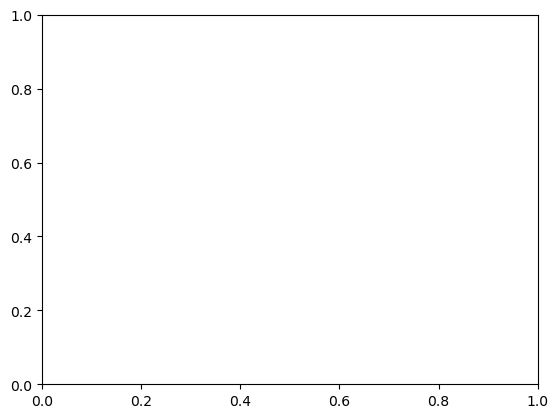

In [38]:
barWidth = 0.25
r1 = np.arange(len(sizes))
r2 = [x + barWidth for x in r1]
sizes = [2, 5, 10, 100, 1000]


plt.bar(r1, merge_deltas, color='#7f6d5f', width=barWidth,
        edgecolor='white', label='Merge Sort')
plt.bar(r2, quick_deltas, color='#557f2d', width=barWidth,
        edgecolor='white', label='Quick Sort')
plt.xlabel('Array Size', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(sizes))], sizes)
plt.ylabel('Time for execution')
plt.title('Merge sort vs Quick sort')
plt.ylim(0, 1)
plt.legend()

plt.show()

## Experiments

We ran experiments sorting sorted lists of varying lengths using quicksort and merge sort. We choose to use sorted lists because we had the hypothesis that the worst case complexity of quicksort could be achieved when using this method. And this turned out to be true after taking a look at the data.

## Discussion

The worst case O(n^2) complexity of quicksort would imply that it would perform slower than mergesort at large input sizes, and this disparity would grow as the size of the input became larger. Looking at our results. This is true. It seems that since in this implementation of quicksort, we select the last (high) element as the pivot, in a sorted array, this results in comparing the pivot with each element in the array.


---


E2. Recall that on the first day of class I asked which two algorithms have similar complexity - Merge Sort and Quick Sort under (O(nlogn)) are likely to perform similar under average cases. However, under worst case, the complexity of quick sort is much worse (O(n^2). Design an experiment to show this behavior. Plot this behavior on a bar/line chart.

Next, count the number of "swaps" after which Quick sort starts behaving comparable to Merge sort.

HINT: This will be a threshold at which the quick sort algorithm picks up again.


In [ ]:
# your implementation and code goes here
def test_merge_sort(n):
    merge_sort(generate_near_sorted_list(2500, 2500, n))


def test_quick_sort(n):
    quick_sort(generate_near_sorted_list(2500, 2500, n))


merge_deltas = []
quick_deltas = []
swaps = []

for i in range(0, 251, 50):
    merge_delta = timeit.timeit(lambda: test_merge_sort(i), number=2)
    quick_delta = timeit.timeit(lambda: test_quick_sort(i), number=2)

    merge_deltas.append(merge_delta)
    quick_deltas.append(quick_delta)
    swaps.append(i)

In this section, provide a detailed outline of:

- The experiments you ran and the rationale behind your worst case scenario.
- The plots showing the run times.

Further explain how you computed the swaps and verify that you calculation is correct, by applying it on a diifferent list under same experimental conditions.


## Experiment

We ran an experiment slowly increasing the number of swaps in a sorted array from 0-250, we know that the worst case complexity for quicksort is in a sorted array (if the pivot is at the end of the array), so we predicted that the runtime of quicksort would improve as the array approached the average case, and the runtime of merge sort would worsen as the array approached the average case. This turned out to be true at around 100 swaps when looking at the graph. The disparity between merge sort and quicksort becomes very small, until quicksort becomes more efficient as swaps increase.


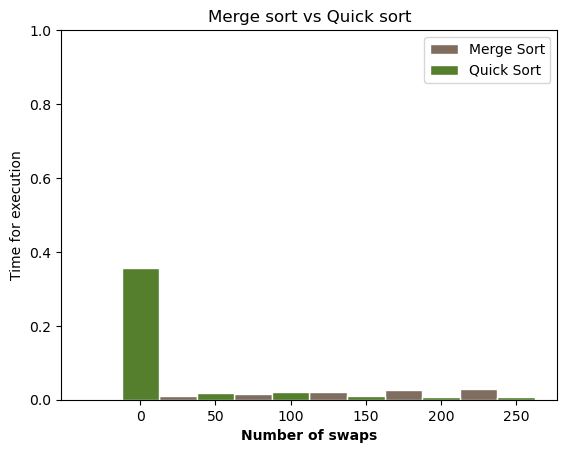

In [ ]:
barWidth = 0.5

r1 = np.arange(len(swaps))
r2 = [x + barWidth for x in r1]

plt.bar(r1, merge_deltas, color='#7f6d5f', width=barWidth,
        edgecolor='white', label='Merge Sort')
plt.bar(r2, quick_deltas, color='#557f2d', width=barWidth,
        edgecolor='white', label='Quick Sort')


plt.xlabel('Number of swaps', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(swaps))], swaps)
plt.ylabel('Time for execution')
plt.title('Merge sort vs Quick sort')
plt.ylim(0, 1)
plt.legend()

plt.show()

**Reflection**

## As the list became more unsorted, the quicksort algorithm approached its average case. After about 100 swaps, the mergesort and quicksort runtimes were comparable, and after 100 swaps, the disparity between mergesort and quicksort runtimes began to widen.

---


### PART F


Traditionally, Insertion Sort is worst than Heap Sort and Merge Sort. Now that you are a master at critical evaluation of sorting and searching algorithms, design an experiment to show that this may not be universally true. That is, there maybe scenarios where insertion sort is better than merge and heap sort.

HINT: Think about the Best Case of insertion sort.

Again, provide:

- An explicit outline of the experiments you ran. That is, list length values, how many “runs”, etc.
- A graph of list length vs time displaying the appropriate three curves showing. List lengths should be small here.
- A brief discussion and conclusion regarding the results. A few sentences are fine here.
- Reflect on why these are experiments are important.

HINT: Can you create some sort of "hybrid" sort that would be better?


In [39]:
# your implementation and code goes here


sizes = [10, 100, 1000, 10000]

merge_deltas = []
heap_deltas = []
insersion_deltas = []

for size in sizes:
    almost_sorted_list = generate_near_sorted_list(size, size, 1)
    insersion_deltas.append(timeit.timeit(lambda: InsertionSort(
        almost_sorted_list.copy()), number=10))
    heap_deltas.append(timeit.timeit(
        lambda: heap_sort(almost_sorted_list.copy()), number=10))
    merge_deltas.append(timeit.timeit(
        lambda: merge_sort(almost_sorted_list.copy()), number=10))

**Reflection**:


As we can see, although the time complexity for insertion sort is 'worse' than heap sort, the insertion sort algorithm is much faster in this case.
Intuitivly, we can see why this is the case by understanding the nature of our list, and also a bit about how python stores lists in memory.
Since the list is mostly sorted, insertion sort rarely need to go back to the sorted partition to insert an unsorted element into the correct place. There are only 10 out of place elements, so at most, it will have to make 10 + 1 passes through the list, with one pass being the pass through the unsorted list. Iterating through an array in python is still a faster operation than array accesses, despite python not storing ints in arrays the same way as in C (not exactly contiguous array of memory, you can refer to docs for more details)

With heap sort on the other hand, the way i chose to implement it was with a max heap, so regardless of the order of the elements in the original array, we need to perform an O(log n) operation (inserting) n times (for each element in the list) This is an average time complexity if O(n log n) for the given list, whereas the insertion sort has a time complexity of 11n at worst (for the given list)

Since the size of the input is sufficiently large (10000), the insertion sort algorithm is faster. I designed this specific test case to take advantage of the fact that insertion sort performs well on a near-sorted list, while heap sort does not take advantage of already-sorted partitions of the list.


---
---


**Team Contributions**: In below section describe in detail how you distributed the workload and contributions of each member in the task.
Saad Khalid (khalis68) - Set up Git repo, worked on parts A, D, E, F


Saad Khalid (khalis68) -> Worked on part A, D, E, F
Jenil Maru (maruj) -> Worked on Part B, C
Pritha Saha (sahap9) -> Worked on Part A, B


---
---
